<a href="https://colab.research.google.com/github/afafrafat77/COVID-19-data-analysis/blob/main/notebook/COVID_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import necessary libraries


In [518]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from dash import Dash, dcc, html, Input, Output ,callback,dash_table
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Load the datasets

In [519]:
covid_complete_df =pd.read_csv("/content/covid_19_clean_complete.csv")
country_wise_df=pd.read_csv("/content/country_wise_latest.csv")
Day_wise_df=pd.read_csv("/content/day_wise.csv")
full_grouped_df=pd.read_csv("/content/full_grouped.csv")
usa_county_wise_df=pd.read_csv("/content/usa_county_wise.csv")
worldometer_df=pd.read_csv("/content/worldometer_data.csv")

## Displaying and Cleaning covid_complete_df




In [520]:
covid_complete_df.head(10)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa
5,NaN,Antigua and Barbuda,17.06080,-61.796400,2020-01-22,0,0,0,0,Americas
6,NaN,Argentina,-38.41610,-63.616700,2020-01-22,0,0,0,0,Americas
7,NaN,Armenia,40.06910,45.038200,2020-01-22,0,0,0,0,Europe
8,Australian Capital Territory,Australia,-35.47350,149.012400,2020-01-22,0,0,0,0,Western Pacific
9,New South Wales,Australia,-33.86880,151.209300,2020-01-22,0,0,0,0,Western Pacific


In [521]:
covid_complete_df.shape

(49068, 10)

In [522]:
covid_complete_df .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [523]:
covid_complete_df .describe()

,Lat,Long,Confirmed,Deaths,Recovered,Active
count,49068.000000,49068.000000,4.906800e+04,49068.000000,4.906800e+04,4.906800e+04
mean,21.433730,23.528236,1.688490e+04,884.179160,7.915713e+03,8.085012e+03
std,24.950320,70.442740,1.273002e+05,6313.584411,5.480092e+04,7.625890e+04
min,-51.796300,-135.000000,0.000000e+00,0.000000,0.000000e+00,-1.400000e+01
25%,7.873054,-15.310100,4.000000e+00,0.000000,0.000000e+00,0.000000e+00
50%,23.634500,21.745300,1.680000e+02,2.000000,2.900000e+01,2.600000e+01
75%,41.204380,80.771797,1.518250e+03,30.000000,6.660000e+02,6.060000e+02
max,71.706900,178.065000,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06


In [524]:
#covid_complete_df .drop(columns=['Lat','Long'],inplace=True)


In [525]:
covid_complete_df .isnull().sum()

,0
Province/State,34404
Country/Region,0
Lat,0
Long,0
Date,0
Confirmed,0
Deaths,0
Recovered,0
Active,0
WHO Region,0


In [526]:
covid_complete_df ['Province/State'].unique()

array([nan, 'Australian Capital Territory', 'New South Wales',
       'Northern Territory', 'Queensland', 'South Australia', 'Tasmania',
       'Victoria', 'Western Australia', 'Alberta', 'British Columbia',
       'Manitoba', 'New Brunswick', 'Newfoundland and Labrador',
       'Nova Scotia', 'Ontario', 'Prince Edward Island', 'Quebec',
       'Saskatchewan', 'Anhui', 'Beijing', 'Chongqing', 'Fujian', 'Gansu',
       'Guangdong', 'Guangxi', 'Guizhou', 'Hainan', 'Hebei',
       'Heilongjiang', 'Henan', 'Hong Kong', 'Hubei', 'Hunan',
       'Inner Mongolia', 'Jiangsu', 'Jiangxi', 'Jilin', 'Liaoning',
       'Macau', 'Ningxia', 'Qinghai', 'Shaanxi', 'Shandong', 'Shanghai',
       'Shanxi', 'Sichuan', 'Tianjin', 'Tibet', 'Xinjiang', 'Yunnan',
       'Zhejiang', 'Faroe Islands', 'Greenland', 'French Guiana',
       'French Polynesia', 'Guadeloupe', 'Mayotte', 'New Caledonia',
       'Reunion', 'Saint Barthelemy', 'St Martin', 'Martinique', 'Aruba',
       'Curacao', 'Sint Maarten', 'Bermud

In [527]:
#Too many null values better to drop the whole column
covid_complete_df .drop(columns='Province/State',inplace=True)

In [528]:
covid_complete_df.duplicated().sum()


0

In [529]:
covid_complete_df ['Date'] = pd.to_datetime(covid_complete_df['Date'])

In [530]:
# covid_complete_df.sort_values(by='Date', inplace=True)
# covid_complete_df.set_index('Date', inplace=True)


In [531]:
covid_complete_df .rename(columns={'Country/Region':'Country'},inplace=True)

In [532]:
# Check for logical inconsistencies
covid_complete_df = covid_complete_df[covid_complete_df['Confirmed'] >= covid_complete_df['Deaths'] + covid_complete_df['Recovered']]


In [533]:
covid_complete_df

,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...
49063,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


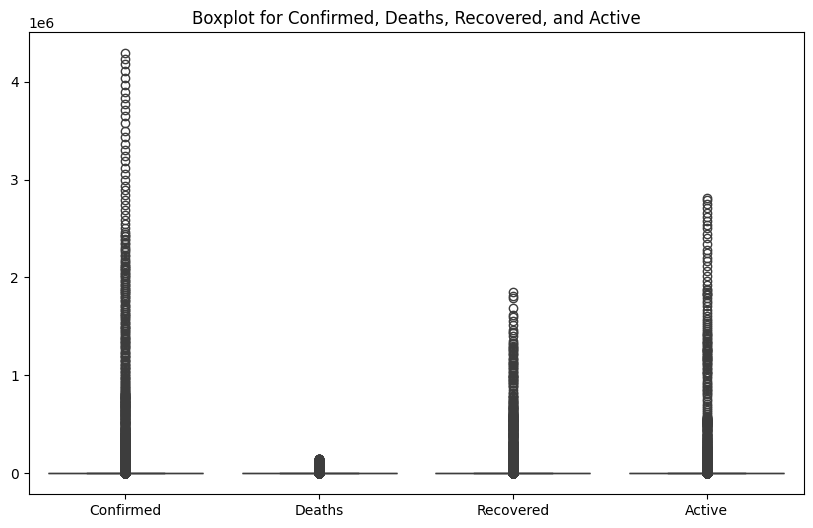

In [534]:
plt.figure(figsize=(10, 6))

sns.boxplot(data=covid_complete_df[['Confirmed', 'Deaths', 'Recovered', 'Active']])

plt.title('Boxplot for Confirmed, Deaths, Recovered, and Active')

plt.show()


In [535]:
covid_complete_df.to_csv('covid_complete_df.csv', index=False)


In [536]:
# Columns to apply log transformation
columns_to_transform = ['Confirmed', 'Deaths', 'Recovered','Active']

# Apply log transformation (log1p to handle zero values)
for col in columns_to_transform:
    covid_complete_df[col] = covid_complete_df[col].apply(lambda x: np.log1p(x))  # log1p(x) = log(x + 1)


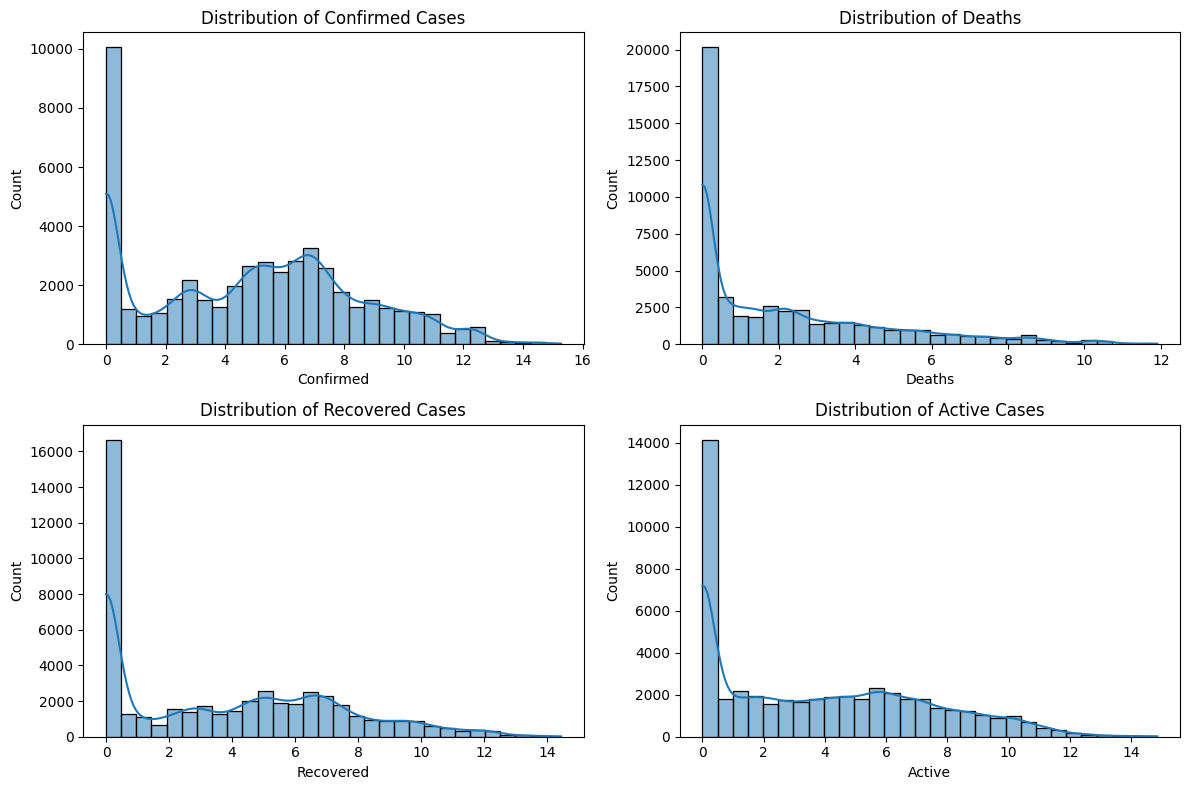

In [537]:

# Distribution plots for key columns
plt.figure(figsize=(12,8))

# Histogram of Confirmed Cases
plt.subplot(2, 2, 1)
sns.histplot(covid_complete_df['Confirmed'], bins=30, kde=True)
plt.title('Distribution of Confirmed Cases')

# Histogram of Deaths
plt.subplot(2, 2, 2)
sns.histplot(covid_complete_df['Deaths'], bins=30, kde=True)
plt.title('Distribution of Deaths')

# Histogram of Recovered
plt.subplot(2, 2, 3)
sns.histplot(covid_complete_df['Recovered'], bins=30, kde=True)
plt.title('Distribution of Recovered Cases')

# Histogram of Active
plt.subplot(2, 2, 4)
sns.histplot(covid_complete_df['Active'], bins=30, kde=True)
plt.title('Distribution of Active Cases')

plt.tight_layout()
plt.show()


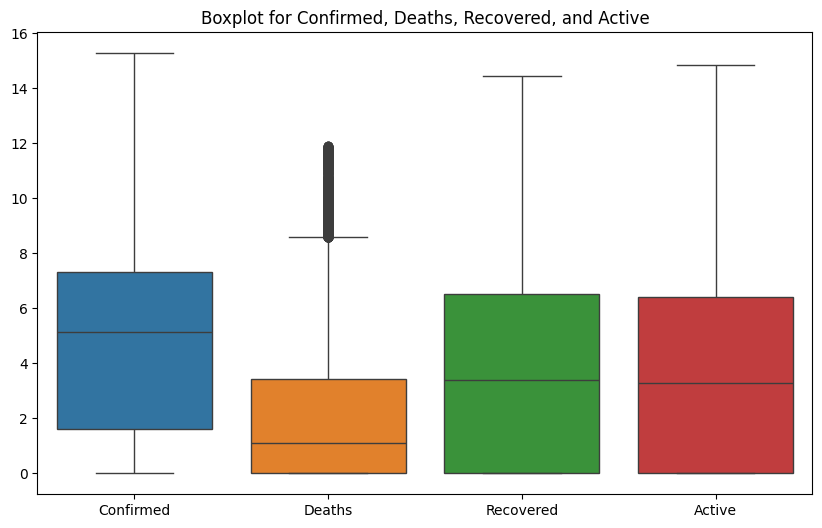

In [538]:
plt.figure(figsize=(10, 6))

sns.boxplot(data=covid_complete_df[['Confirmed', 'Deaths', 'Recovered', 'Active']])

plt.title('Boxplot for Confirmed, Deaths, Recovered, and Active')

plt.show()

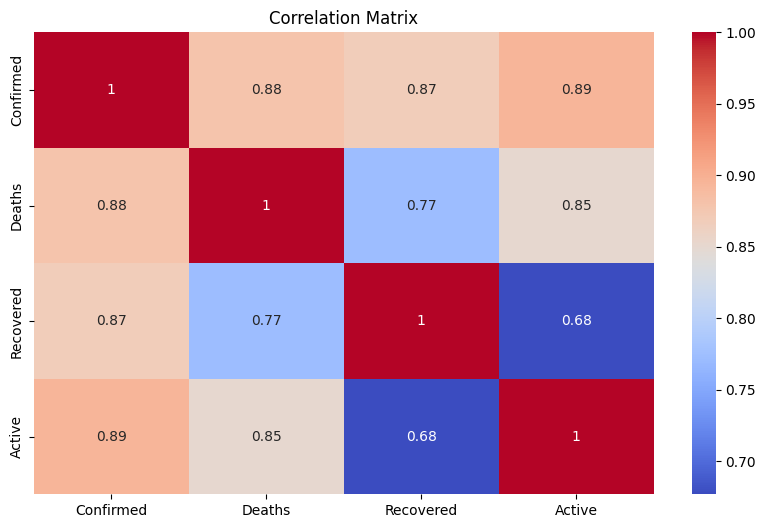

In [539]:
plt.figure(figsize=(10, 6))

sns.heatmap(covid_complete_df[['Confirmed', 'Deaths', 'Recovered', 'Active']].corr(), annot=True, cmap='coolwarm')

plt.title('Correlation Matrix')

plt.show()

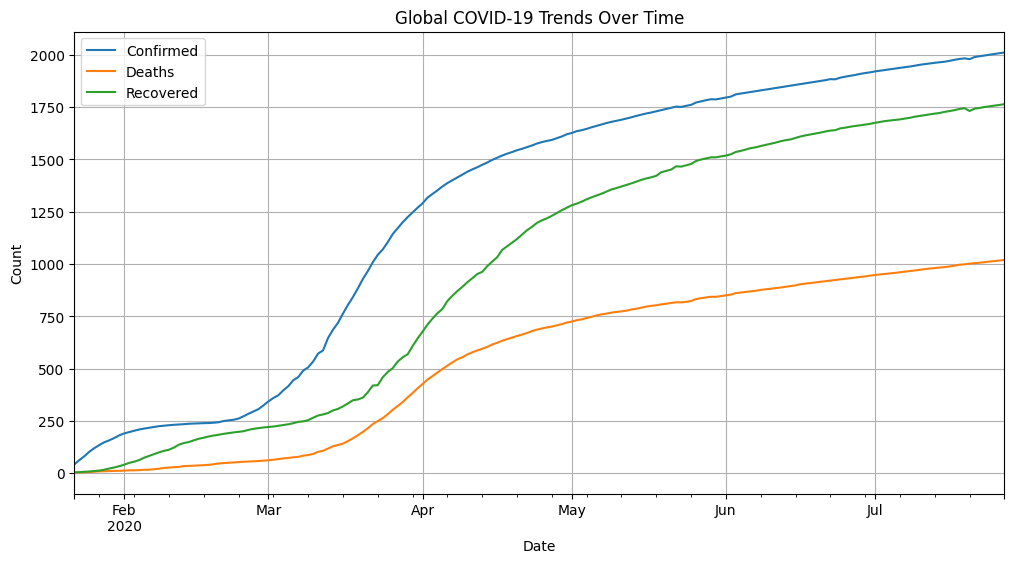

In [540]:
# Trends over time
global_trends = covid_complete_df.groupby('Date')[['Confirmed', 'Deaths', 'Recovered']].sum()

# Plotting trends
plt.figure(figsize=(12, 6))
global_trends.plot(ax=plt.gca())
plt.title("Global COVID-19 Trends Over Time")
plt.xlabel("Date")
plt.ylabel("Count")
plt.legend(['Confirmed', 'Deaths', 'Recovered'])
plt.grid(True)
plt.show()



<ipython-input-541-8304ee058bb8>:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-541-8304ee058bb8>:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




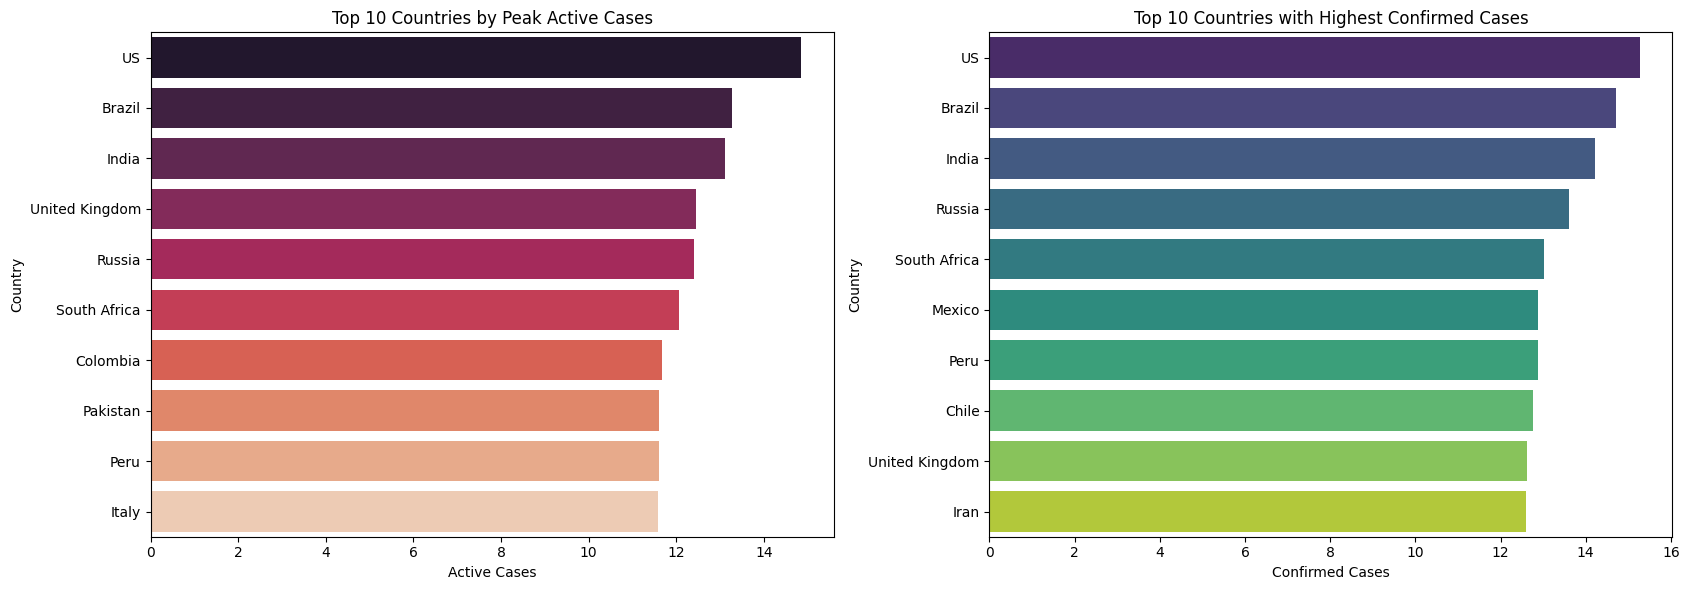

In [541]:
# Distribution of cases across countries


# Identify peak active cases for specific countries
top_active = covid_complete_df.groupby('Country')['Active'].max().sort_values(ascending=False).head(10)
top_countries = covid_complete_df.groupby('Country')['Confirmed'].max().sort_values(ascending=False).head(10)

plt.figure(figsize=(17, 6))
plt.subplot(1, 2, 1)
sns.barplot(x=top_active.values, y=top_active.index, palette="rocket")
plt.title("Top 10 Countries by Peak Active Cases")
plt.xlabel("Active Cases")
plt.ylabel("Country")

plt.subplot(1, 2, 2)
sns.barplot(x=top_countries.values, y=top_countries.index, palette="viridis")
plt.title("Top 10 Countries with Highest Confirmed Cases")
plt.xlabel("Confirmed Cases")
plt.ylabel("Country")
plt.tight_layout()
plt.show()


<ipython-input-542-43af7ca3ec6c>:17: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-542-43af7ca3ec6c>:24: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




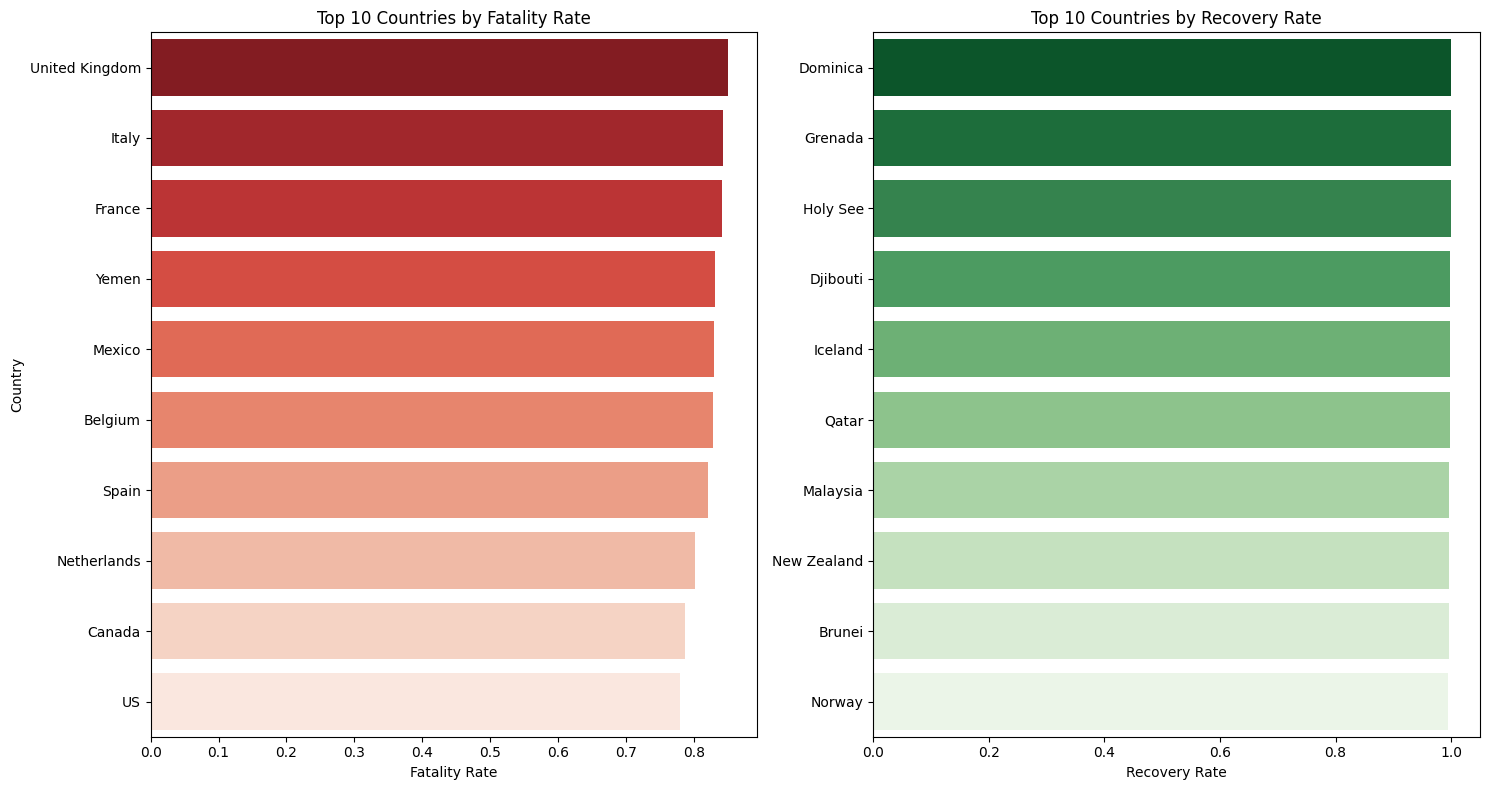

In [542]:
# Calculate recovery and fatality rates for each country
country_stats = covid_complete_df.groupby('Country')[['Confirmed', 'Deaths', 'Recovered']].max()
country_stats['Recovery Rate'] = (country_stats['Recovered'] / country_stats['Confirmed']).fillna(0)
country_stats['Fatality Rate'] = (country_stats['Deaths'] / country_stats['Confirmed']).fillna(0)

# Top 10 countries by fatality rate
top_fatality = country_stats.sort_values('Fatality Rate', ascending=False).head(10)
top_recovery = country_stats.sort_values('Recovery Rate', ascending=False).head(10)



# Subplots for Fatality and Recovery Rates
plt.figure(figsize=(15, 8))

# Top 10 Countries by Fatality Rate
plt.subplot(1, 2, 1)
sns.barplot(x=top_fatality['Fatality Rate'], y=top_fatality.index, palette="Reds_r")
plt.title("Top 10 Countries by Fatality Rate")
plt.xlabel("Fatality Rate")
plt.ylabel("Country")

# Top 10 Countries by Recovery Rate
plt.subplot(1, 2, 2)
sns.barplot(x=top_recovery['Recovery Rate'], y=top_recovery.index, palette="Greens_r")
plt.title("Top 10 Countries by Recovery Rate")
plt.xlabel("Recovery Rate")
plt.ylabel("")

plt.tight_layout()
plt.show()


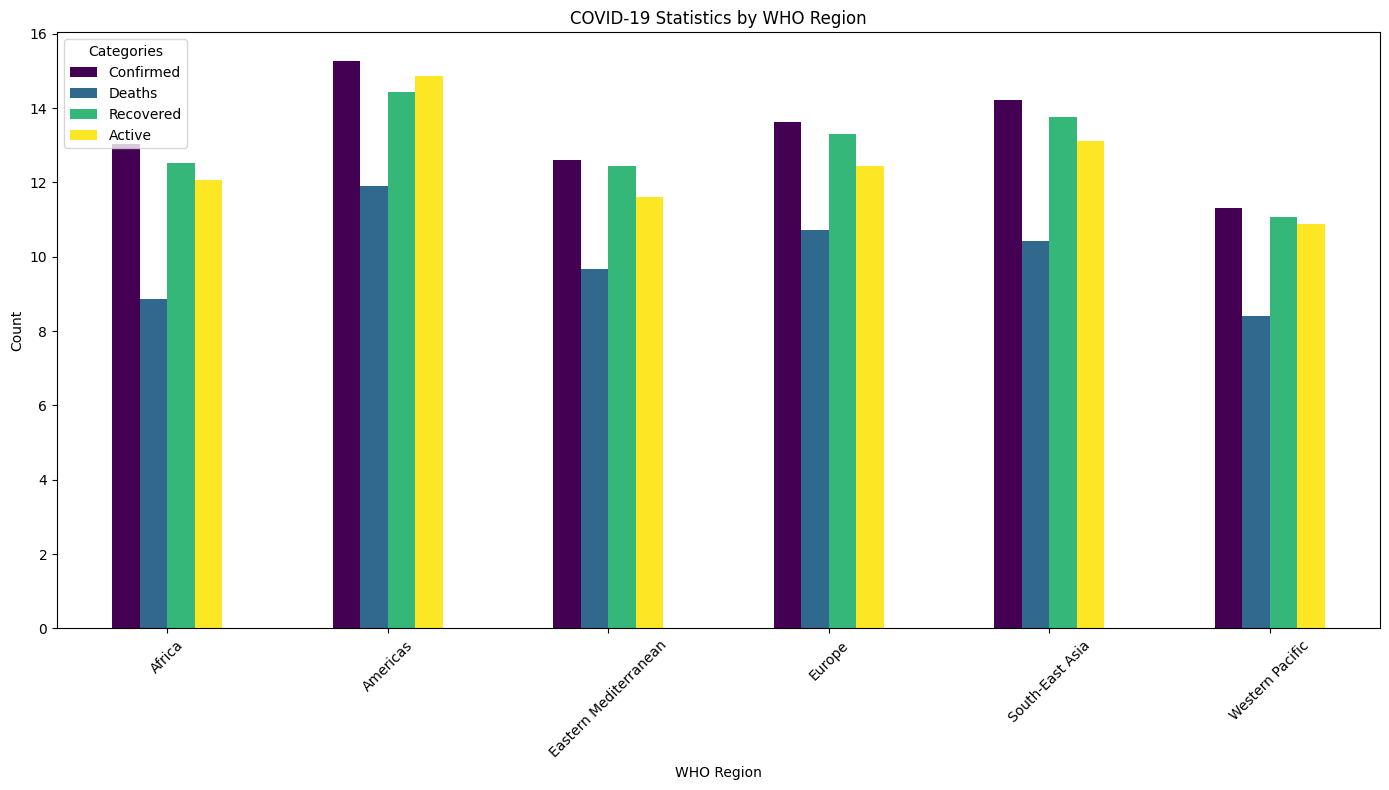

In [543]:
# Aggregate data by WHO Region and calculate the max value for each category
region_stats = covid_complete_df.groupby('WHO Region')[['Confirmed', 'Deaths', 'Recovered', 'Active']].max()

# Create a barplot directly with the aggregated data
region_stats.plot(kind='bar', figsize=(14,8), stacked=False, colormap='viridis')

# Customize the plot
plt.title("COVID-19 Statistics by WHO Region")
plt.xlabel("WHO Region")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Categories", loc='upper left')
plt.tight_layout()
plt.show()




In [544]:
# Calculate recovery and fatality rates
covid_complete_df['Recovery Rate'] = covid_complete_df['Recovered'] / covid_complete_df['Confirmed']
covid_complete_df['Fatality Rate'] = covid_complete_df['Deaths'] / covid_complete_df['Confirmed']

# Fill NaN values in rates (resulting from zero Confirmed cases)
covid_complete_df['Recovery Rate'].fillna(0, inplace=True)
covid_complete_df['Fatality Rate'].fillna(0, inplace=True)

<ipython-input-544-b38cfffa7b95>:6: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



<ipython-input-544-b38cfffa7b95>:7: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or d

## Displaying and Cleaning country_wise_df

In [545]:
country_wise_df.head(10)



,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa
5,Antigua and Barbuda,86,3,65,18,4,0,5,3.49,75.58,4.62,76,10,13.16,Americas
6,Argentina,167416,3059,72575,91782,4890,120,2057,1.83,43.35,4.21,130774,36642,28.02,Americas
7,Armenia,37390,711,26665,10014,73,6,187,1.90,71.32,2.67,34981,2409,6.89,Europe
8,Australia,15303,167,9311,5825,368,6,137,1.09,60.84,1.79,12428,2875,23.13,Western Pacific
9,Austria,20558,713,18246,1599,86,1,37,3.47,88.75,3.91,19743,815,4.13,Europe


In [546]:
country_wise_df.shape

(187, 15)

In [547]:
country_wise_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country/Region          187 non-null    object 
 1   Confirmed               187 non-null    int64  
 2   Deaths                  187 non-null    int64  
 3   Recovered               187 non-null    int64  
 4   Active                  187 non-null    int64  
 5   New cases               187 non-null    int64  
 6   New deaths              187 non-null    int64  
 7   New recovered           187 non-null    int64  
 8   Deaths / 100 Cases      187 non-null    float64
 9   Recovered / 100 Cases   187 non-null    float64
 10  Deaths / 100 Recovered  187 non-null    float64
 11  Confirmed last week     187 non-null    int64  
 12  1 week change           187 non-null    int64  
 13  1 week % increase       187 non-null    float64
 14  WHO Region              187 non-null    ob

In [548]:
country_wise_df.drop(columns=['Confirmed last week', 'Deaths / 100 Cases', 'Recovered / 100 Cases', 'Deaths / 100 Recovered'],inplace=True)

In [549]:
country_wise_df.rename(columns = {'Country/Region': 'Country', '1 week % increase': 'Weekly_Increase_Percentage'}, inplace = True)

In [550]:
country_wise_df

,Country,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,1 week change,Weekly_Increase_Percentage,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,201,26.84,Africa
...,...,...,...,...,...,...,...,...,...,...,...
182,West Bank and Gaza,10621,78,3752,6791,152,2,0,1705,19.12,Eastern Mediterranean
183,Western Sahara,10,1,8,1,0,0,0,0,0.00,Africa
184,Yemen,1691,483,833,375,10,4,36,72,4.45,Eastern Mediterranean
185,Zambia,4552,140,2815,1597,71,1,465,1226,36.86,Africa


In [551]:
country_wise_df.describe()

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,1 week change,Weekly_Increase_Percentage
count,1.870000e+02,187.000000,1.870000e+02,1.870000e+02,187.000000,187.000000,187.000000,187.000000,187.000000
mean,8.813094e+04,3497.518717,5.063148e+04,3.400194e+04,1222.957219,28.957219,933.812834,9448.459893,13.606203
std,3.833187e+05,14100.002482,1.901882e+05,2.133262e+05,5710.374790,120.037173,4197.719635,47491.127684,24.509838
min,1.000000e+01,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,-47.000000,-3.840000
25%,1.114000e+03,18.500000,6.265000e+02,1.415000e+02,4.000000,0.000000,0.000000,49.000000,2.775000
50%,5.059000e+03,108.000000,2.815000e+03,1.600000e+03,49.000000,1.000000,22.000000,432.000000,6.890000
75%,4.046050e+04,734.000000,2.260600e+04,9.149000e+03,419.500000,6.000000,221.000000,3172.000000,16.855000
max,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06,56336.000000,1076.000000,33728.000000,455582.000000,226.320000


In [552]:
country_wise_df.duplicated().sum()

0

In [553]:
country_wise_df.isnull().sum()

,0
Country,0
Confirmed,0
Deaths,0
Recovered,0
Active,0
New cases,0
New deaths,0
New recovered,0
1 week change,0
Weekly_Increase_Percentage,0


In [554]:
# Check for logical inconsistencies
country_wise_df = country_wise_df[country_wise_df['Confirmed'] >= country_wise_df['Deaths'] + country_wise_df['Recovered']]


In [555]:
country_wise_df

,Country,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,1 week change,Weekly_Increase_Percentage,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,201,26.84,Africa
...,...,...,...,...,...,...,...,...,...,...,...
182,West Bank and Gaza,10621,78,3752,6791,152,2,0,1705,19.12,Eastern Mediterranean
183,Western Sahara,10,1,8,1,0,0,0,0,0.00,Africa
184,Yemen,1691,483,833,375,10,4,36,72,4.45,Eastern Mediterranean
185,Zambia,4552,140,2815,1597,71,1,465,1226,36.86,Africa


In [556]:
# Columns to apply log transformation
columns_to_transform = ['Confirmed', 'Deaths', 'Recovered', 'New cases', 'Active','Weekly_Increase_Percentage','New deaths']

# Apply log transformation (log1p to handle zero values)
for col in columns_to_transform:
    country_wise_df[col] = country_wise_df[col].apply(lambda x: np.log1p(x))  # log1p(x) = log(x + 1)


<ipython-input-556-2a595ebd1323>:6: RuntimeWarning:

invalid value encountered in log1p



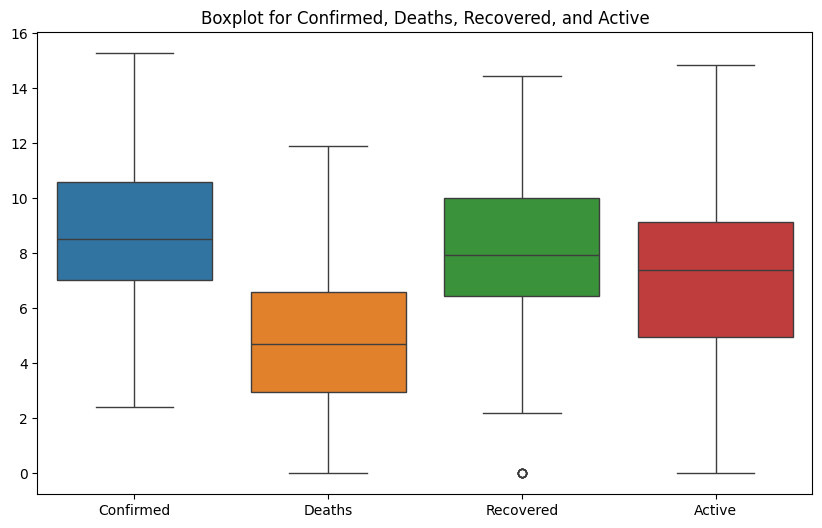

In [557]:
# Boxplot to detect outliers in key columns
plt.figure(figsize=(10, 6))
sns.boxplot(data=country_wise_df[['Confirmed', 'Deaths', 'Recovered', 'Active']])
plt.title('Boxplot for Confirmed, Deaths, Recovered, and Active')
plt.show()

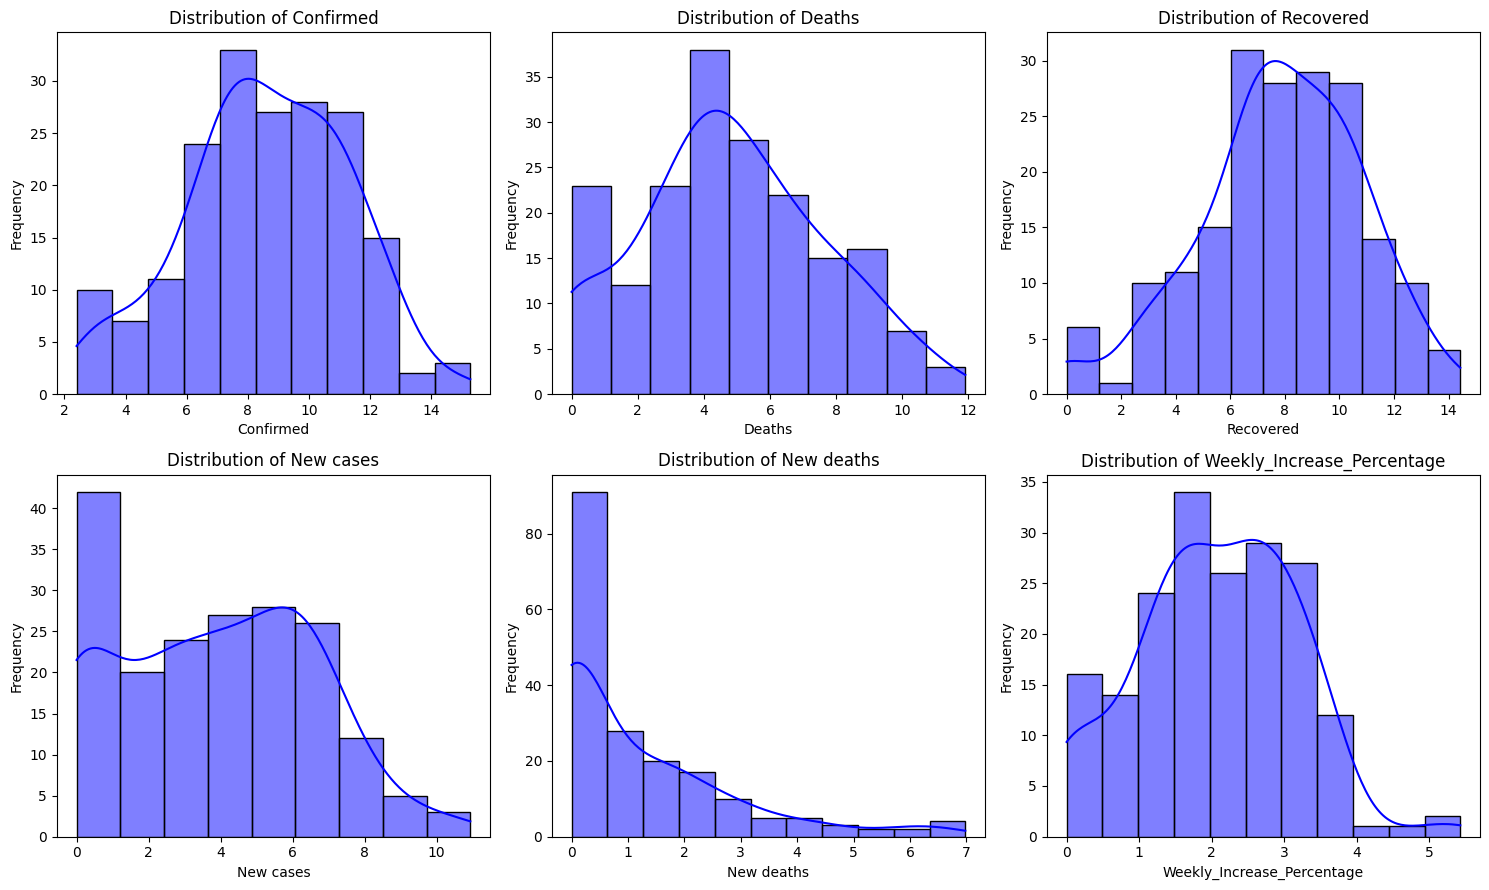

In [558]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of key columns to analyze
columns = ['Confirmed', 'Deaths', 'Recovered', 'New cases', 'New deaths','Weekly_Increase_Percentage']

# Create subplots for distributions
fig, axes = plt.subplots(2, 3, figsize=(15, 9))

# Plot histograms and KDE for each key column
for i, col in enumerate(columns):
    sns.histplot(country_wise_df[col], kde=True, ax=axes[i // 3, i % 3],color='blue')
    axes[i // 3, i % 3].set_title(f'Distribution of {col}')
    axes[i // 3, i % 3].set_xlabel(col)
    axes[i // 3, i % 3].set_ylabel("Frequency")

plt.tight_layout()
plt.show()


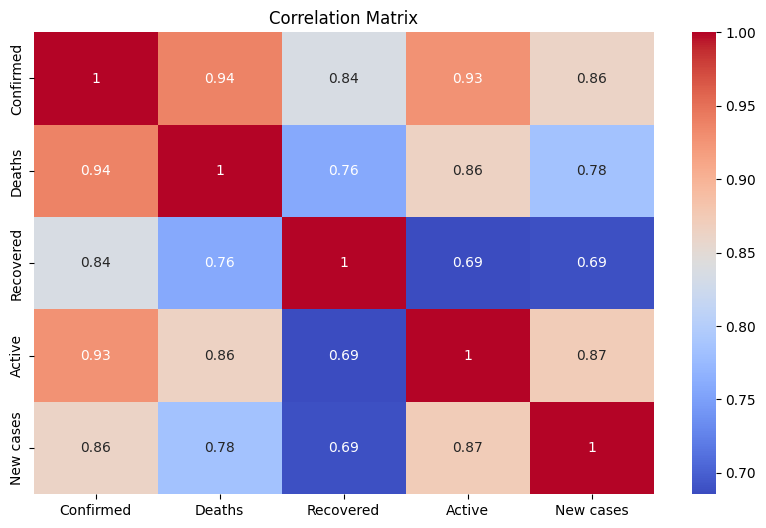

In [559]:
plt.figure(figsize=(10, 6))

sns.heatmap(country_wise_df[['Confirmed', 'Deaths', 'Recovered', 'Active','New cases']].corr(), annot=True, cmap='coolwarm')

plt.title('Correlation Matrix')

plt.show()

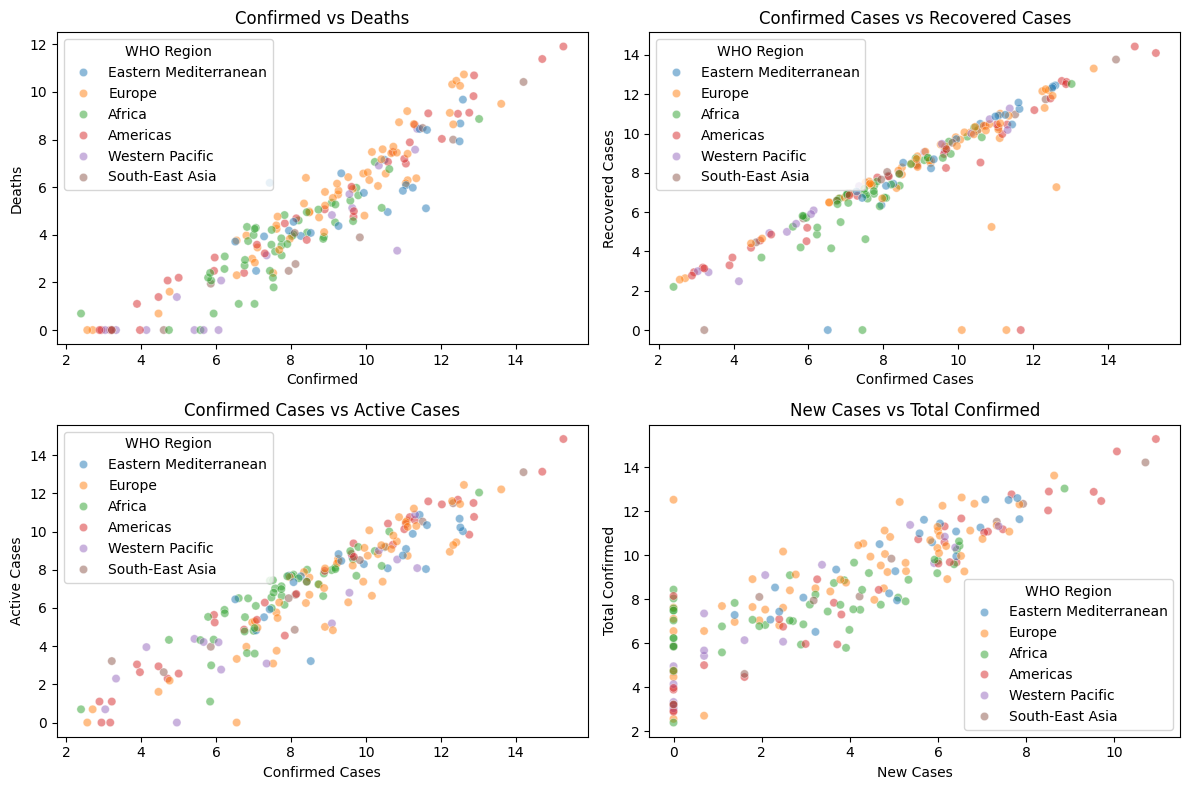

In [560]:
# Plotting scatter plots between pairs of variables
plt.figure(figsize=(12,8))
plt.subplot(2, 2, 1)
sns.scatterplot(data=country_wise_df,x='Confirmed', y='Deaths',  hue='WHO Region',alpha=0.5)
plt.title('Confirmed vs Deaths')
plt.xlabel('Confirmed')
plt.ylabel('Deaths')

plt.subplot(2, 2, 2)
sns.scatterplot(data=country_wise_df, x='Confirmed', y='Recovered', hue='WHO Region',alpha=0.5)
plt.title('Confirmed Cases vs Recovered Cases')
plt.xlabel('Confirmed Cases')
plt.ylabel('Recovered Cases')

plt.subplot(2, 2, 3)
sns.scatterplot(data=country_wise_df, x='Confirmed', y='Active', hue='WHO Region',alpha=0.5)
plt.title('Confirmed Cases vs Active Cases')
plt.xlabel('Confirmed Cases')
plt.ylabel('Active Cases')


# Plotting the new cases vs total confirmed
plt.subplot(2, 2, 4)
sns.scatterplot(data=country_wise_df, x='New cases', y='Confirmed',hue='WHO Region',alpha=0.5)
plt.title('New Cases vs Total Confirmed')
plt.xlabel('New Cases')
plt.ylabel('Total Confirmed')


plt.tight_layout()
plt.show()




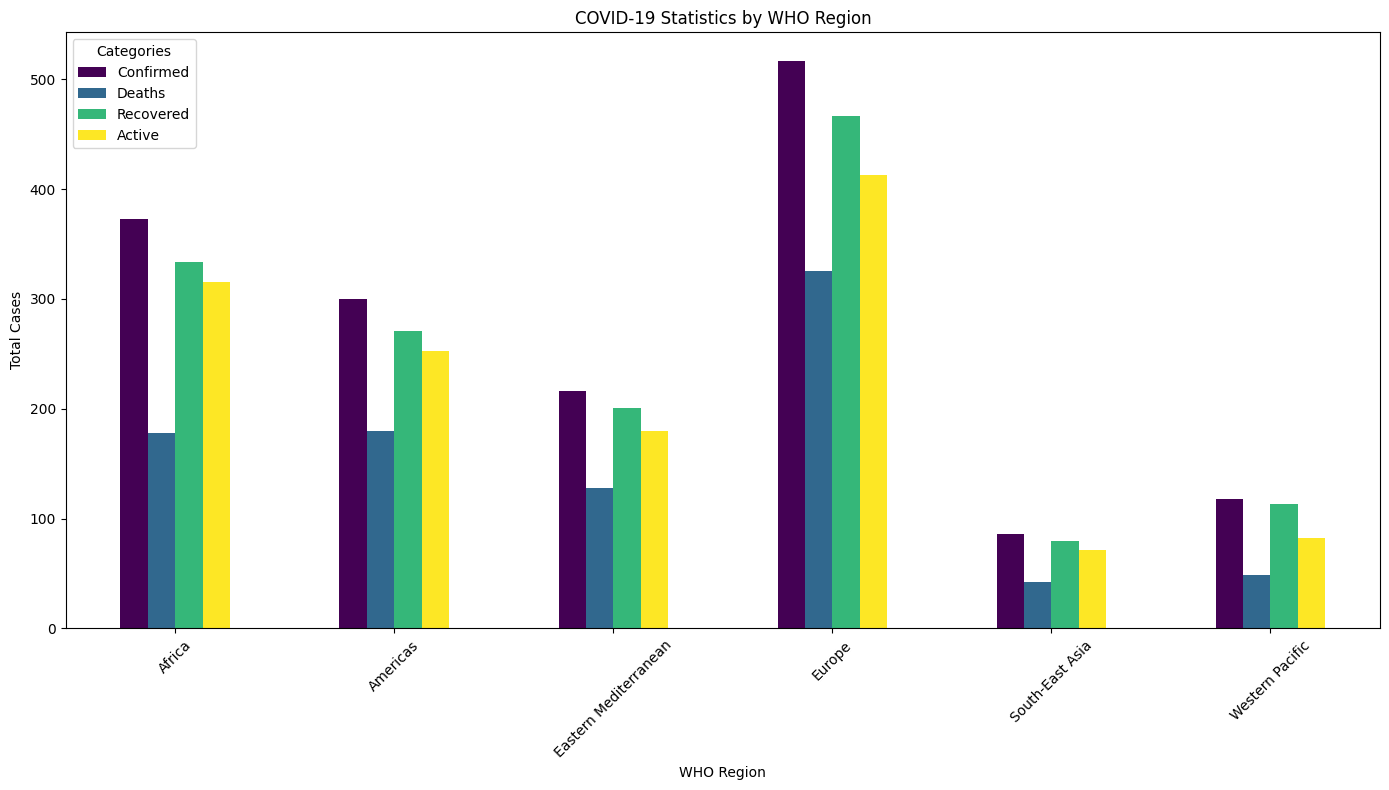

In [561]:
# Group by WHO region and summarize the total statistics
region_stats = country_wise_df.groupby('WHO Region')[['Confirmed', 'Deaths', 'Recovered', 'Active']].sum()

# Plot the statistics by region
region_stats.plot(kind='bar', figsize=(14,8), stacked=False, colormap='viridis')
plt.title('COVID-19 Statistics by WHO Region')
plt.xlabel("WHO Region")
plt.ylabel('Total Cases')
plt.xticks(rotation=45)
plt.legend(title="Categories", loc='upper left')
plt.tight_layout()
plt.show()



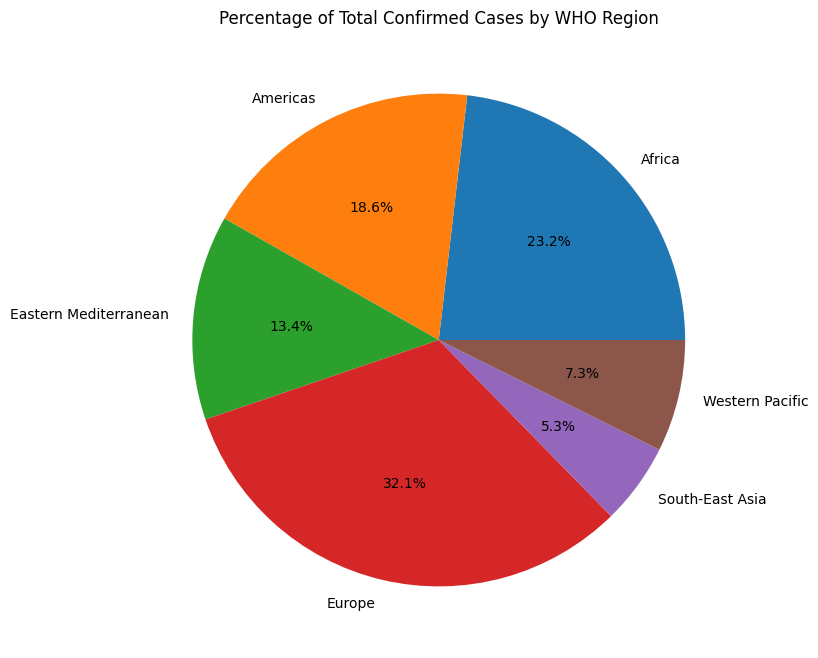

In [562]:


# Percentage of total Confirmed Cases by Region
region_stats['Confirmed %'] = (region_stats['Confirmed'] / region_stats['Confirmed'].sum()) * 100
region_stats['Confirmed %'].plot(kind='pie', figsize=(8, 8), autopct='%1.1f%%')
plt.title('Percentage of Total Confirmed Cases by WHO Region')
plt.ylabel('')
plt.show()


<ipython-input-563-9471fad0719a>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




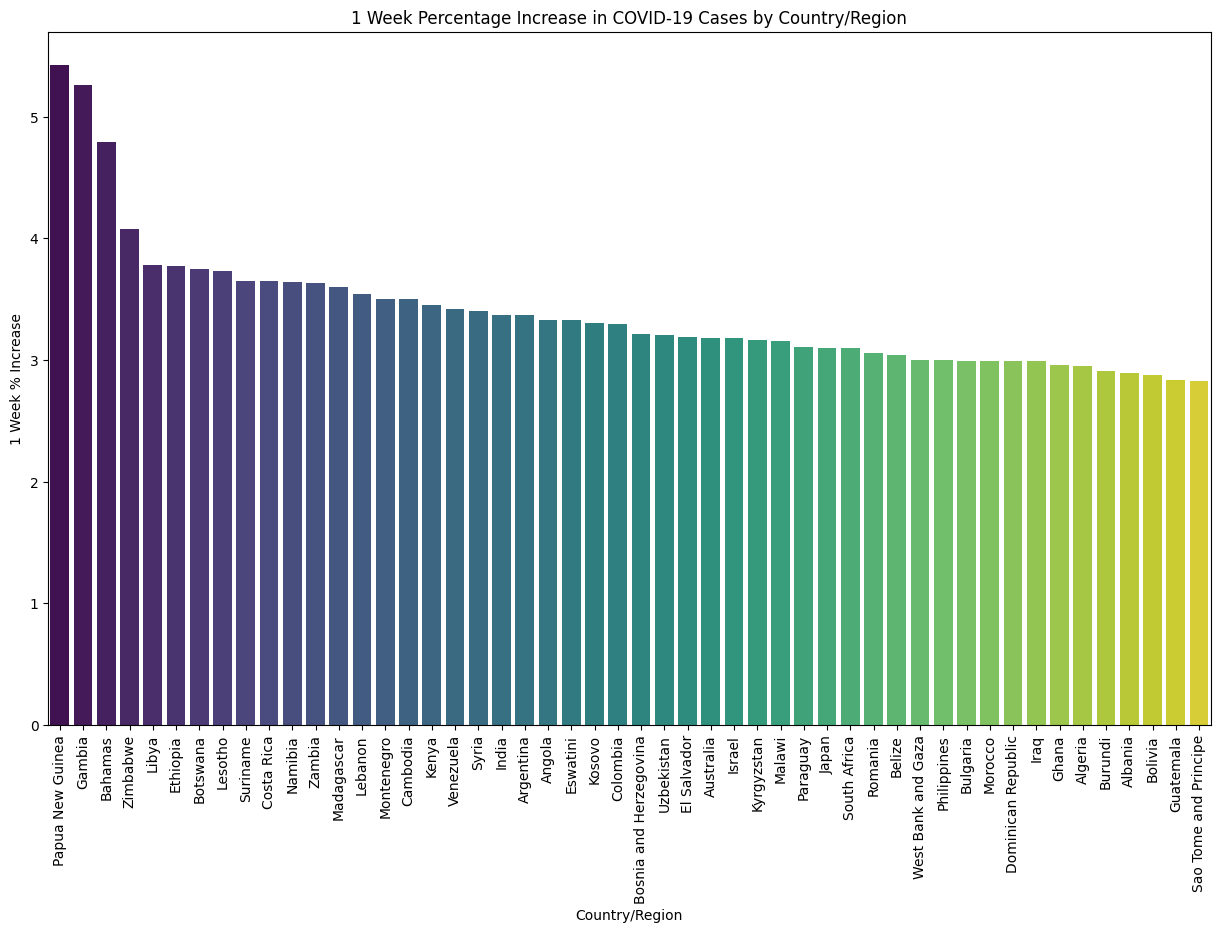

In [563]:
# Bar plot for 1-week percentage increase in confirmed cases
plt.figure(figsize=(15, 9))
top_countries = country_wise_df.sort_values('Weekly_Increase_Percentage', ascending=False).head(50)

sns.barplot(data=top_countries, x='Country', y='Weekly_Increase_Percentage', palette='viridis')
plt.title('1 Week Percentage Increase in COVID-19 Cases by Country/Region')
plt.xticks(rotation=90)
plt.xlabel('Country/Region')
plt.ylabel('1 Week % Increase')
plt.show()


In [564]:

# Calculate recovery and fatality rates
country_wise_df['Recovery Rate'] = country_wise_df['Recovered'] / country_wise_df['Confirmed']
country_wise_df['Fatality Rate'] = country_wise_df['Deaths'] / country_wise_df['Confirmed']

# Fill NaN values in rates (resulting from zero Confirmed cases)
country_wise_df['Recovery Rate'].fillna(0, inplace=True)
country_wise_df['Fatality Rate'].fillna(0, inplace=True)


<ipython-input-564-977fc843b4f8>:6: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



<ipython-input-564-977fc843b4f8>:7: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or d

## Displaying and Cleaning Day_wise_df



In [565]:
Day_wise_df.head(10)

,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries
0,2020-01-22,555,17,28,510,0,0,0,3.06,5.05,60.71,6
1,2020-01-23,654,18,30,606,99,1,2,2.75,4.59,60.00,8
2,2020-01-24,941,26,36,879,287,8,6,2.76,3.83,72.22,9
3,2020-01-25,1434,42,39,1353,493,16,3,2.93,2.72,107.69,11
4,2020-01-26,2118,56,52,2010,684,14,13,2.64,2.46,107.69,13
5,2020-01-27,2927,82,61,2784,809,26,9,2.80,2.08,134.43,16
6,2020-01-28,5578,131,107,5340,2651,49,46,2.35,1.92,122.43,16
7,2020-01-29,6166,133,125,5908,588,2,18,2.16,2.03,106.40,18
8,2020-01-30,8234,171,141,7922,2068,38,16,2.08,1.71,121.28,20
9,2020-01-31,9927,213,219,9495,1693,42,78,2.15,2.21,97.26,24


In [566]:
Day_wise_df.shape

(188, 12)

In [567]:
Day_wise_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    188 non-null    object 
 1   Confirmed               188 non-null    int64  
 2   Deaths                  188 non-null    int64  
 3   Recovered               188 non-null    int64  
 4   Active                  188 non-null    int64  
 5   New cases               188 non-null    int64  
 6   New deaths              188 non-null    int64  
 7   New recovered           188 non-null    int64  
 8   Deaths / 100 Cases      188 non-null    float64
 9   Recovered / 100 Cases   188 non-null    float64
 10  Deaths / 100 Recovered  188 non-null    float64
 11  No. of countries        188 non-null    int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 17.8+ KB


In [568]:
Day_wise_df.describe()

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries
count,1.880000e+02,188.000000,1.880000e+02,1.880000e+02,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000
mean,4.406960e+06,230770.760638,2.066001e+06,2.110188e+06,87771.021277,3478.824468,50362.015957,4.860638,34.343936,22.104521,144.351064
std,4.757988e+06,217929.094183,2.627976e+06,1.969670e+06,75295.293255,2537.735652,56090.892479,1.579541,16.206159,22.568307,65.175979
min,5.550000e+02,17.000000,2.800000e+01,5.100000e+02,0.000000,0.000000,0.000000,2.040000,1.710000,6.260000,6.000000
25%,1.121910e+05,3935.000000,6.044125e+04,5.864175e+04,5568.500000,250.750000,2488.250000,3.510000,22.785000,9.650000,101.250000
50%,2.848733e+06,204190.000000,7.847840e+05,1.859759e+06,81114.000000,4116.000000,30991.500000,4.850000,35.680000,15.380000,184.000000
75%,7.422046e+06,418634.500000,3.416396e+06,3.587015e+06,131502.500000,5346.000000,79706.250000,6.297500,48.945000,25.342500,187.000000
max,1.648048e+07,654036.000000,9.468087e+06,6.358362e+06,282756.000000,9966.000000,284394.000000,7.180000,57.450000,134.430000,187.000000


In [569]:
Day_wise_df.isnull().sum()

,0
Date,0
Confirmed,0
Deaths,0
Recovered,0
Active,0
New cases,0
New deaths,0
New recovered,0
Deaths / 100 Cases,0
Recovered / 100 Cases,0


In [570]:
Day_wise_df ['Date'] = pd.to_datetime(Day_wise_df['Date'])

In [571]:
Day_wise_df.sort_values(by='Date', inplace=True)
Day_wise_df.set_index('Date', inplace=True)

In [572]:
Day_wise_df .rename(columns = { 'Deaths / 100 Cases': 'Deaths_Rate','Recovered / 100 Cases': 'Recovered_Rate'}, inplace = True)

In [573]:
Day_wise_df.duplicated().sum()

0

In [574]:
# Check for logical inconsistencies
Day_wise_df = Day_wise_df[Day_wise_df['Confirmed'] >= Day_wise_df['Deaths'] + Day_wise_df['Recovered']]

In [575]:
Day_wise_df

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths_Rate,Recovered_Rate,Deaths / 100 Recovered,No. of countries
Date,,,,,,,,,,,
2020-01-22,555,17,28,510,0,0,0,3.06,5.05,60.71,6
2020-01-23,654,18,30,606,99,1,2,2.75,4.59,60.00,8
2020-01-24,941,26,36,879,287,8,6,2.76,3.83,72.22,9
2020-01-25,1434,42,39,1353,493,16,3,2.93,2.72,107.69,11
2020-01-26,2118,56,52,2010,684,14,13,2.64,2.46,107.69,13
...,...,...,...,...,...,...,...,...,...,...,...
2020-07-23,15510481,633506,8710969,6166006,282756,9966,169714,4.08,56.16,7.27,187
2020-07-24,15791645,639650,8939705,6212290,281164,6144,228736,4.05,56.61,7.16,187
2020-07-25,16047190,644517,9158743,6243930,255545,4867,219038,4.02,57.07,7.04,187


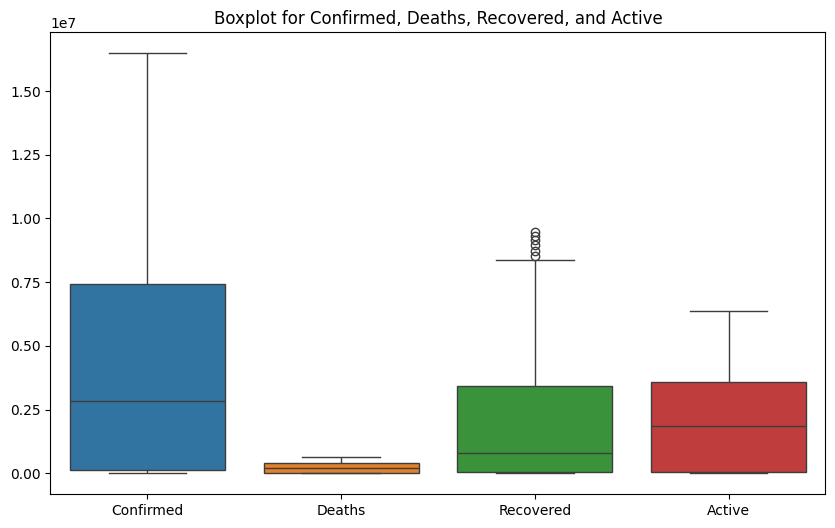

In [576]:
plt.figure(figsize=(10, 6))

sns.boxplot(data=Day_wise_df[['Confirmed', 'Deaths', 'Recovered', 'Active']])

plt.title('Boxplot for Confirmed, Deaths, Recovered, and Active')

plt.show()

In [577]:
# # Columns to apply log transformation
# columns_to_transform = ['Confirmed', 'Deaths', 'Recovered','Active']

# # Apply log transformation (log1p to handle zero values)
# for col in columns_to_transform:
#     Day_wise_df[col] = Day_wise_df[col].apply(lambda x: np.log1p(x))  # log1p(x) = log(x + 1)


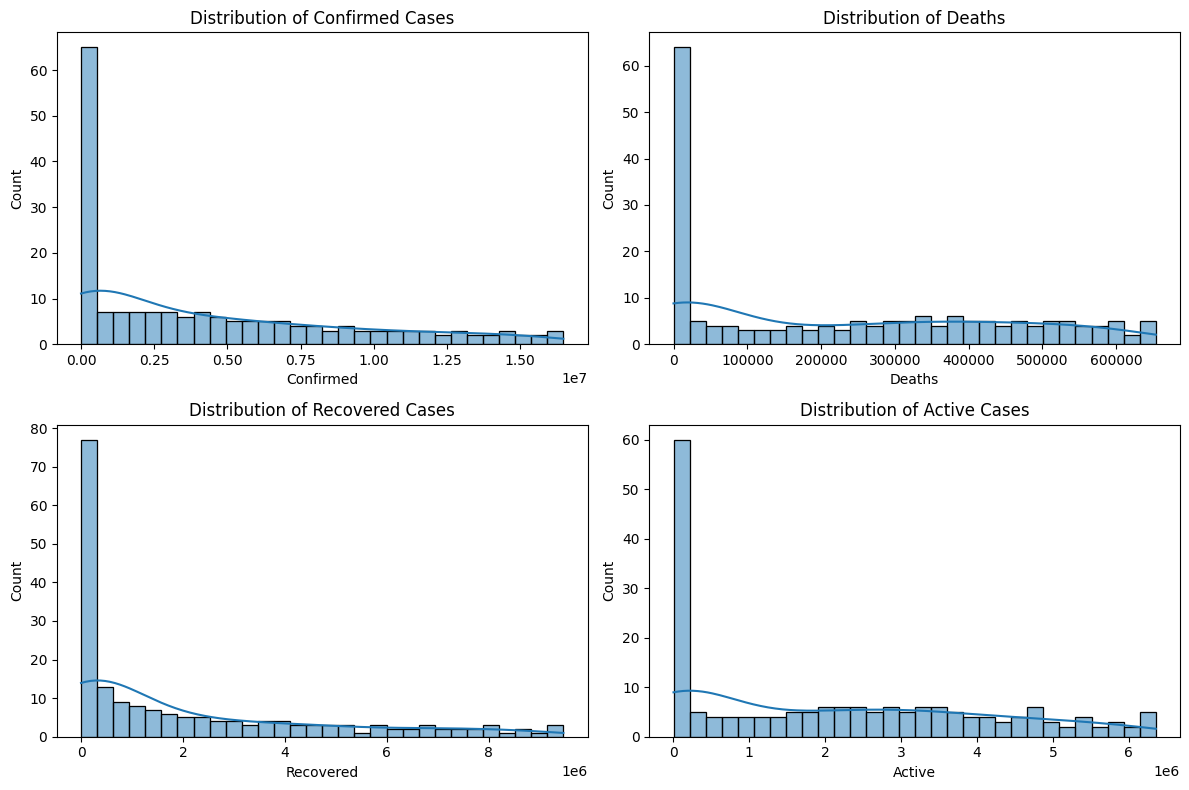

In [578]:

# Distribution plots for key columns
plt.figure(figsize=(12,8))

# Histogram of Confirmed Cases
plt.subplot(2, 2, 1)
sns.histplot(Day_wise_df['Confirmed'], bins=30, kde=True)
plt.title('Distribution of Confirmed Cases')

# Histogram of Deaths
plt.subplot(2, 2, 2)
sns.histplot(Day_wise_df['Deaths'], bins=30, kde=True)
plt.title('Distribution of Deaths')

# Histogram of Recovered
plt.subplot(2, 2, 3)
sns.histplot(Day_wise_df['Recovered'], bins=30, kde=True)
plt.title('Distribution of Recovered Cases')

# Histogram of Active
plt.subplot(2, 2, 4)
sns.histplot(Day_wise_df['Active'], bins=30, kde=True)
plt.title('Distribution of Active Cases')

plt.tight_layout()
plt.show()


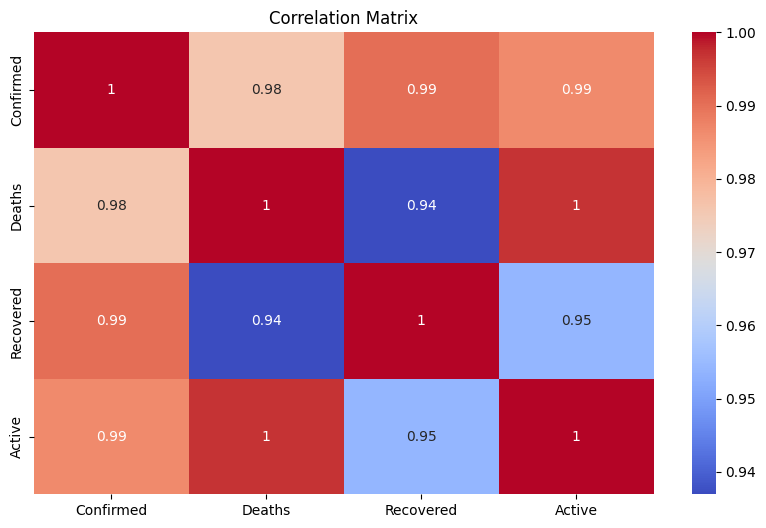

In [579]:
plt.figure(figsize=(10, 6))

sns.heatmap(Day_wise_df[['Confirmed', 'Deaths', 'Recovered', 'Active']].corr(), annot=True, cmap='coolwarm')

plt.title('Correlation Matrix')

plt.show()

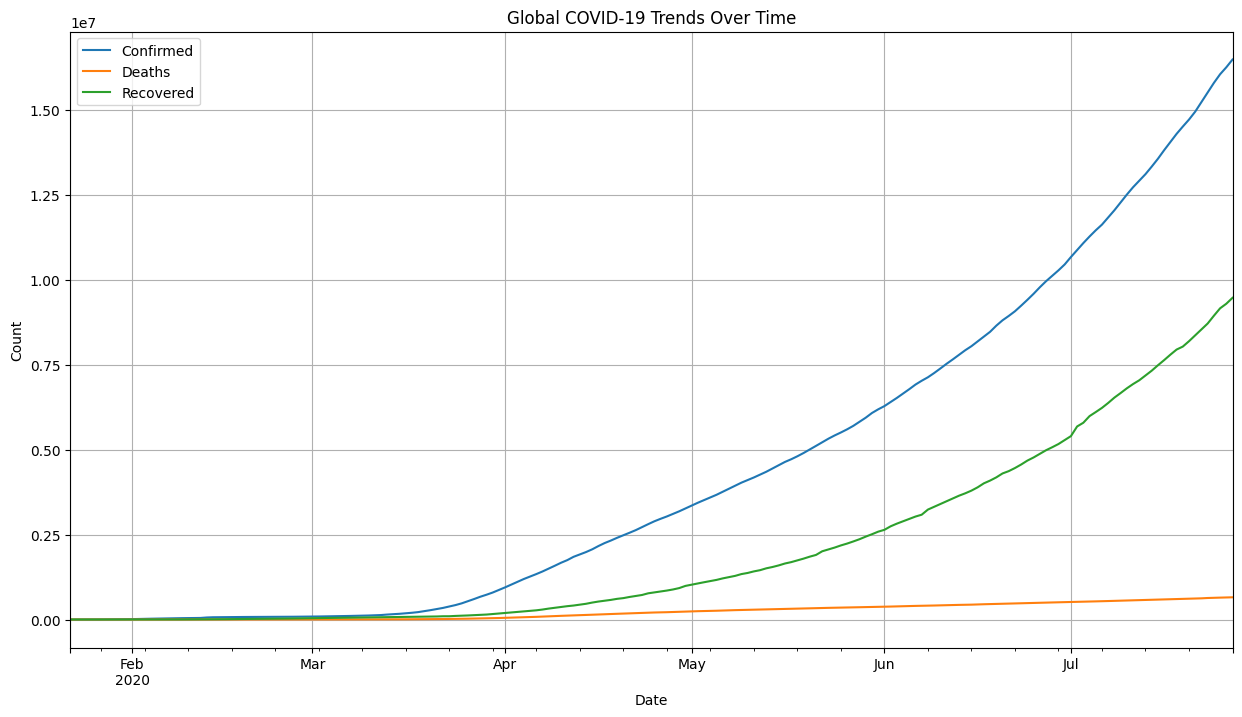

In [580]:
# Trends over time
global_trends2= Day_wise_df.groupby('Date')[['Confirmed', 'Deaths', 'Recovered']].sum()

# Plotting trends
plt.figure(figsize=(15, 8))
global_trends2.plot(ax=plt.gca())
plt.title("Global COVID-19 Trends Over Time")
plt.xlabel("Date")
plt.ylabel("Count")
plt.legend(['Confirmed', 'Deaths', 'Recovered'])
plt.grid(True)
plt.show()

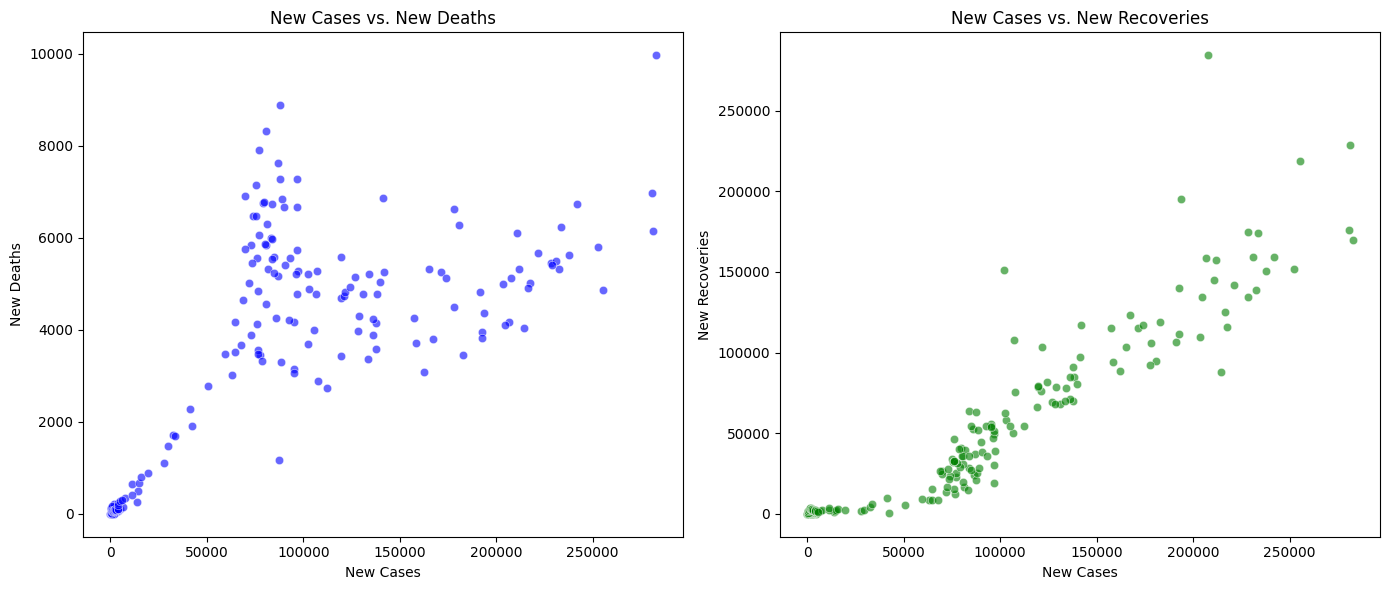

In [581]:
plt.figure(figsize=(14,6))
plt.subplot(1, 2, 1)
sns.scatterplot(x=Day_wise_df['New cases'], y=Day_wise_df['New deaths'], alpha=0.6, color='blue')
plt.title('New Cases vs. New Deaths')
plt.xlabel('New Cases')
plt.ylabel('New Deaths')

plt.subplot(1, 2, 2)
sns.scatterplot(x=Day_wise_df['New cases'], y=Day_wise_df['New recovered'], alpha=0.6, color='green')
plt.title('New Cases vs. New Recoveries')
plt.xlabel('New Cases')
plt.ylabel('New Recoveries')

plt.tight_layout()
plt.show()


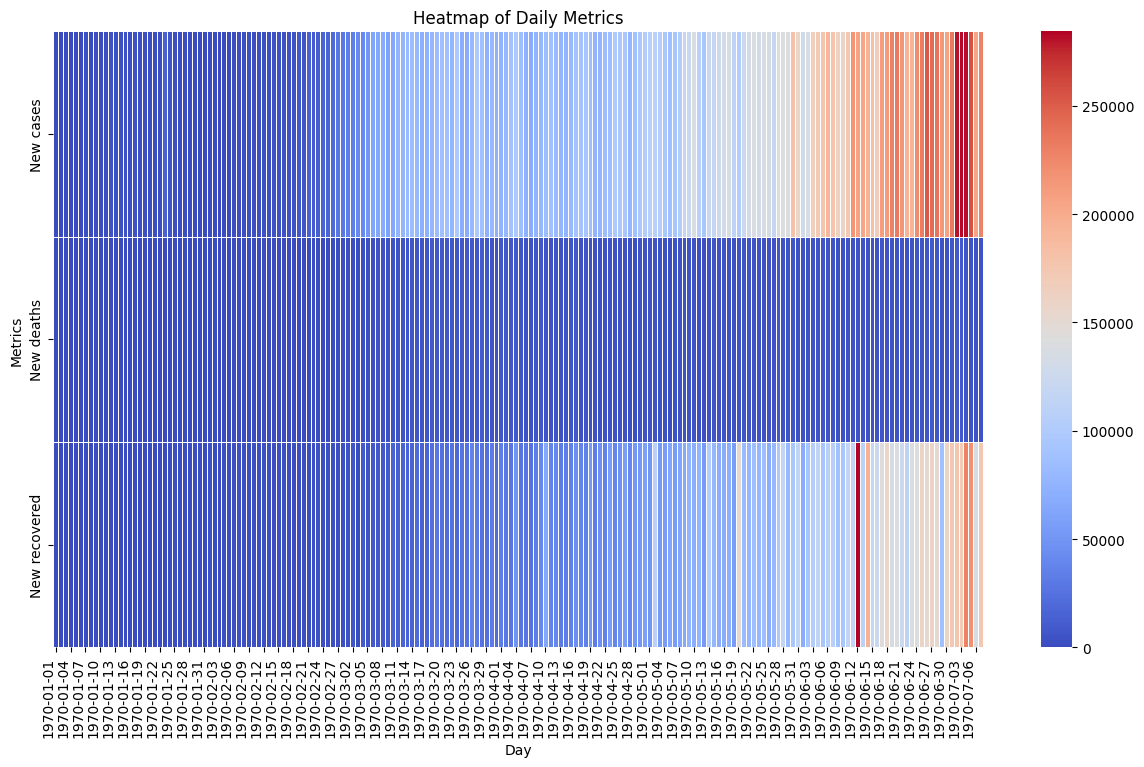

In [582]:
import matplotlib.dates as mdates

plt.figure(figsize=(15, 8))
ax = sns.heatmap(Day_wise_df[['New cases', 'New deaths', 'New recovered']].T,
            cmap='coolwarm',
            cbar=True,
            annot=False,
            linewidths=0.5,
            fmt='.0f')

# Format x-axis tick labels to display only date
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Format as 'YYYY-MM-DD'

# Rotate x-axis tick labels for better readability (optional)
plt.xticks(ha='right')

plt.title('Heatmap of Daily Metrics')
plt.ylabel('Metrics')
plt.xlabel('Day')
plt.show()

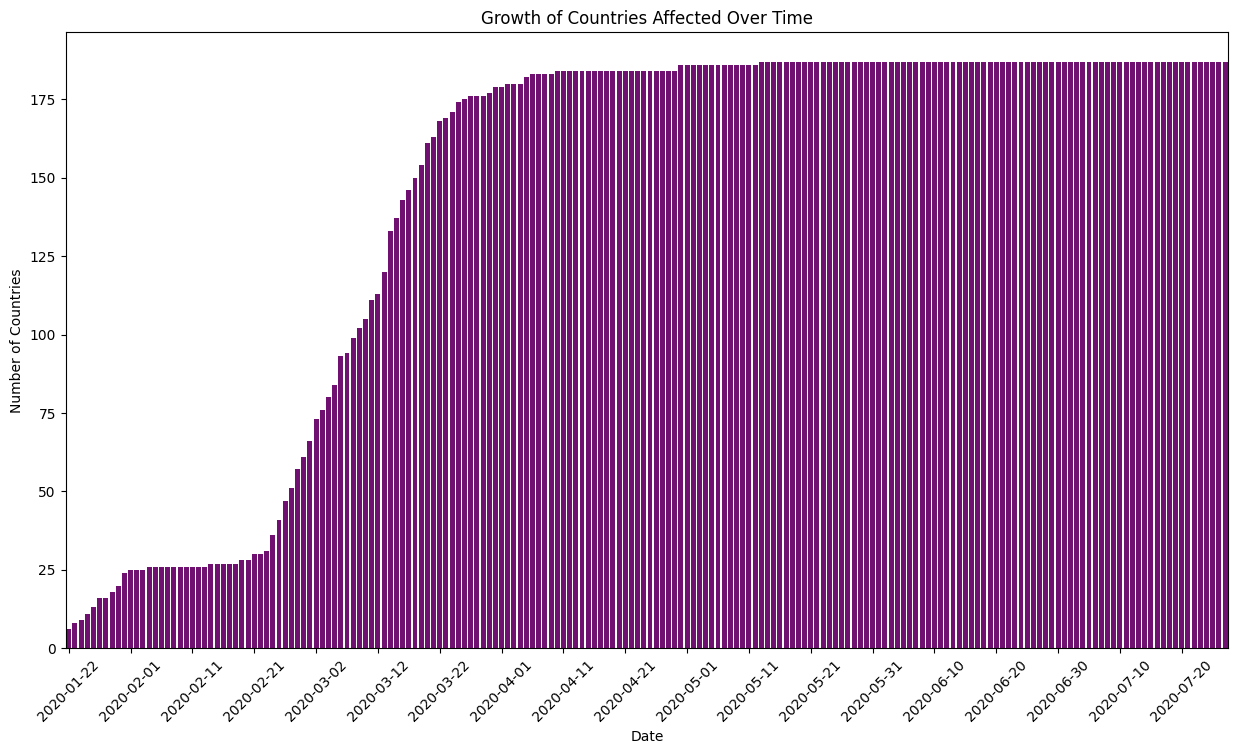

In [583]:
# Plot the bar chart
plt.figure(figsize=(15, 8))
sns.barplot(x=Day_wise_df.index.strftime('%Y-%m-%d'), y=Day_wise_df['No. of countries'], color='purple')  # Use index for x-axis
plt.title('Growth of Countries Affected Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Countries')

# Set xticks at regular intervals (e.g., every 10th day)
tick_interval = 10  # Adjust this value to control the number of ticks
tick_locations = Day_wise_df.index[::tick_interval].strftime('%Y-%m-%d')
#tick_labels = Day_wise_df.index.strftime('%Y-%m-%d')[::tick_interval] # Access index directly for labels

plt.xticks(ticks=tick_locations,  rotation=45) # labels=tick_labels, Removed labels argument
plt.show()

In [584]:

# Calculate recovery and fatality rates
Day_wise_df['Recovery Rate'] = Day_wise_df['Recovered'] / Day_wise_df['Confirmed']
Day_wise_df['Fatality Rate'] = Day_wise_df['Deaths'] / Day_wise_df['Confirmed']

# Fill NaN values in rates (resulting from zero Confirmed cases)
Day_wise_df['Recovery Rate'].fillna(0, inplace=True)
Day_wise_df['Fatality Rate'].fillna(0, inplace=True)


<ipython-input-584-9da138baa82e>:6: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



<ipython-input-584-9da138baa82e>:7: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or d

##Displaying and Cleaning full_grouped_df

In [585]:
full_grouped_df.head(10)

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean
1,2020-01-22,Albania,0,0,0,0,0,0,0,Europe
2,2020-01-22,Algeria,0,0,0,0,0,0,0,Africa
3,2020-01-22,Andorra,0,0,0,0,0,0,0,Europe
4,2020-01-22,Angola,0,0,0,0,0,0,0,Africa
5,2020-01-22,Antigua and Barbuda,0,0,0,0,0,0,0,Americas
6,2020-01-22,Argentina,0,0,0,0,0,0,0,Americas
7,2020-01-22,Armenia,0,0,0,0,0,0,0,Europe
8,2020-01-22,Australia,0,0,0,0,0,0,0,Western Pacific
9,2020-01-22,Austria,0,0,0,0,0,0,0,Europe


In [586]:
full_grouped_df.shape

(35156, 10)

In [587]:
full_grouped_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35156 entries, 0 to 35155
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            35156 non-null  object
 1   Country/Region  35156 non-null  object
 2   Confirmed       35156 non-null  int64 
 3   Deaths          35156 non-null  int64 
 4   Recovered       35156 non-null  int64 
 5   Active          35156 non-null  int64 
 6   New cases       35156 non-null  int64 
 7   New deaths      35156 non-null  int64 
 8   New recovered   35156 non-null  int64 
 9   WHO Region      35156 non-null  object
dtypes: int64(7), object(3)
memory usage: 2.7+ MB


In [588]:
full_grouped_df.describe()

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
count,3.515600e+04,35156.000000,3.515600e+04,3.515600e+04,35156.00000,35156.000000,35156.000000
mean,2.356663e+04,1234.068239,1.104813e+04,1.128443e+04,469.36375,18.603339,269.315593
std,1.499818e+05,7437.238354,6.454640e+04,8.997149e+04,3005.86754,115.706351,2068.063852
min,0.000000e+00,0.000000,0.000000e+00,-2.000000e+00,0.00000,-1918.000000,-16298.000000
25%,1.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.00000,0.000000,0.000000
50%,2.500000e+02,4.000000,3.300000e+01,8.500000e+01,2.00000,0.000000,0.000000
75%,3.640250e+03,78.250000,1.286250e+03,1.454000e+03,75.00000,1.000000,20.000000
max,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06,77255.00000,3887.000000,140050.000000


In [589]:
full_grouped_df.isnull().sum()

,0
Date,0
Country/Region,0
Confirmed,0
Deaths,0
Recovered,0
Active,0
New cases,0
New deaths,0
New recovered,0
WHO Region,0


In [590]:
full_grouped_df.duplicated().sum()

0

In [591]:
full_grouped_df ['Date'] = pd.to_datetime(full_grouped_df['Date'])

In [592]:
full_grouped_df.sort_values(by='Date', inplace=True)
full_grouped_df.set_index('Date', inplace=True)


In [593]:
full_grouped_df .rename(columns = { 'Country/Region': 'Country'}, inplace = True)

In [594]:
# Check for logical inconsistencies
full_grouped_df = full_grouped_df[full_grouped_df['Confirmed'] >= full_grouped_df['Deaths'] + full_grouped_df['Recovered']]

In [595]:
full_grouped_df

,Country,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
Date,,,,,,,,,
2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean
2020-01-22,Netherlands,0,0,0,0,0,0,0,Europe
2020-01-22,New Zealand,0,0,0,0,0,0,0,Western Pacific
2020-01-22,Nicaragua,0,0,0,0,0,0,0,Americas
2020-01-22,Niger,0,0,0,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...
2020-07-27,Georgia,1137,16,922,199,6,0,2,Europe
2020-07-27,Germany,207112,9125,190314,7673,445,1,259,Europe
2020-07-27,Ghana,33624,168,29801,3655,655,0,307,Africa


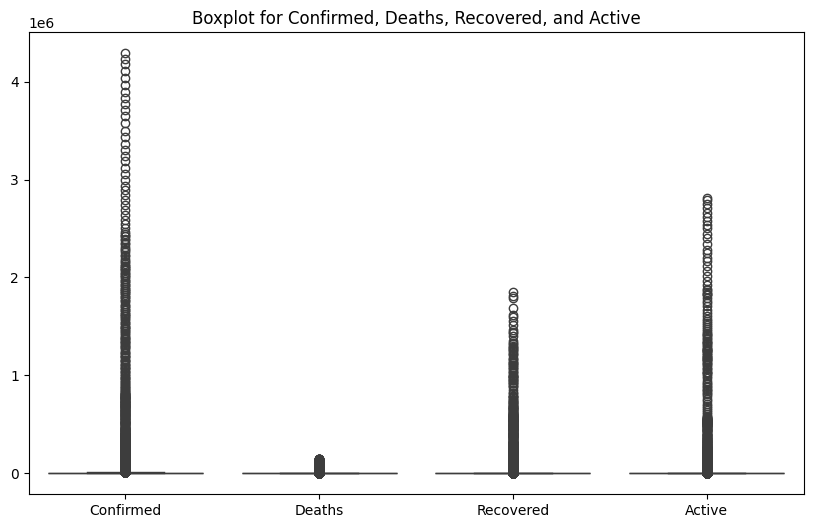

In [596]:
plt.figure(figsize=(10, 6))

sns.boxplot(data=full_grouped_df[['Confirmed', 'Deaths', 'Recovered', 'Active']])

plt.title('Boxplot for Confirmed, Deaths, Recovered, and Active')

plt.show()

In [597]:
# Columns to apply log transformation
columns_to_transform = ['Confirmed', 'Deaths', 'Recovered', 'New cases', 'Active']

# Apply log transformation (log1p to handle zero values)
for col in columns_to_transform:
    full_grouped_df[col] = full_grouped_df[col].apply(lambda x: np.log1p(x))  # log1p(x) = log(x + 1)


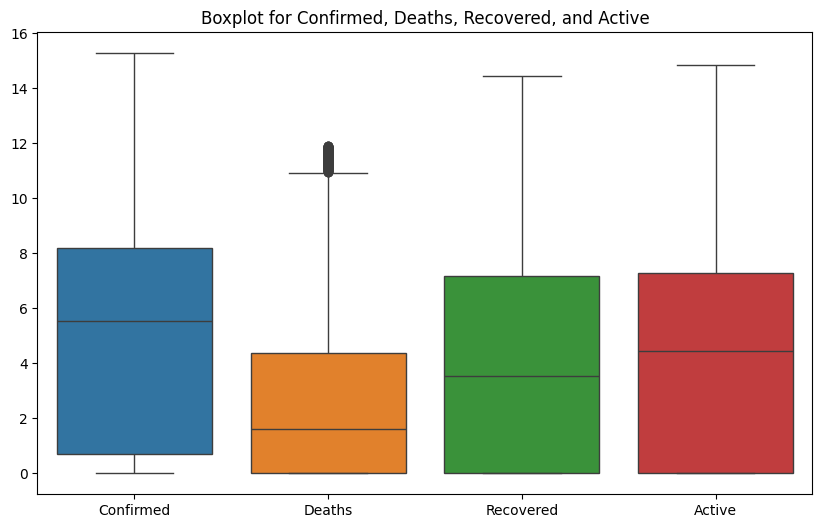

In [598]:
plt.figure(figsize=(10, 6))

sns.boxplot(data=full_grouped_df[['Confirmed', 'Deaths', 'Recovered', 'Active']])

plt.title('Boxplot for Confirmed, Deaths, Recovered, and Active')

plt.show()

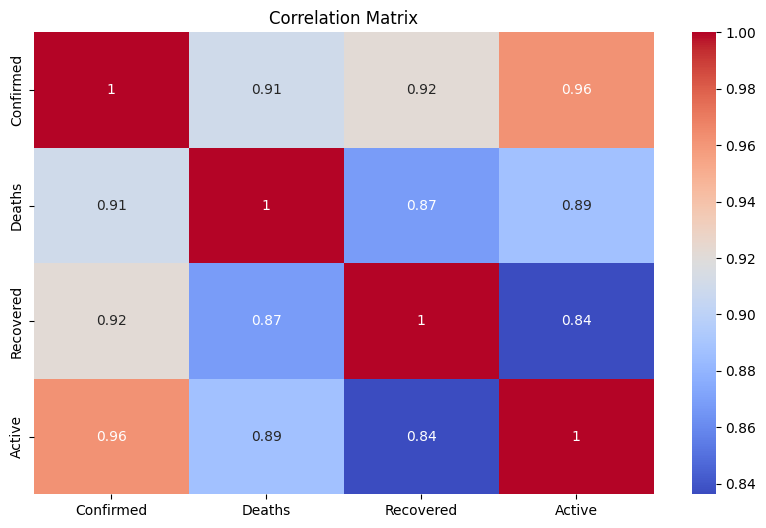

In [599]:
plt.figure(figsize=(10, 6))

sns.heatmap(full_grouped_df[['Confirmed', 'Deaths', 'Recovered', 'Active']].corr(), annot=True, cmap='coolwarm')

plt.title('Correlation Matrix')

plt.show()

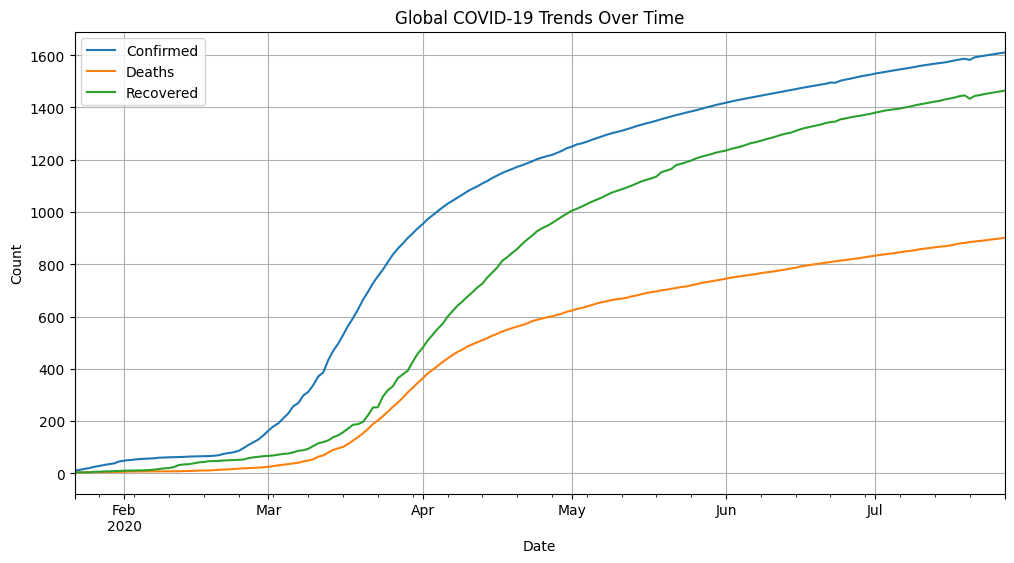

In [600]:
# Trends over time
global_trends = full_grouped_df.groupby('Date')[['Confirmed', 'Deaths', 'Recovered']].sum()

# Plotting trends
plt.figure(figsize=(12, 6))
global_trends.plot(ax=plt.gca())
plt.title("Global COVID-19 Trends Over Time")
plt.xlabel("Date")
plt.ylabel("Count")
plt.legend(['Confirmed', 'Deaths', 'Recovered'])
plt.grid(True)
plt.show()



<ipython-input-601-fc027c82f47b>:17: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-601-fc027c82f47b>:24: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




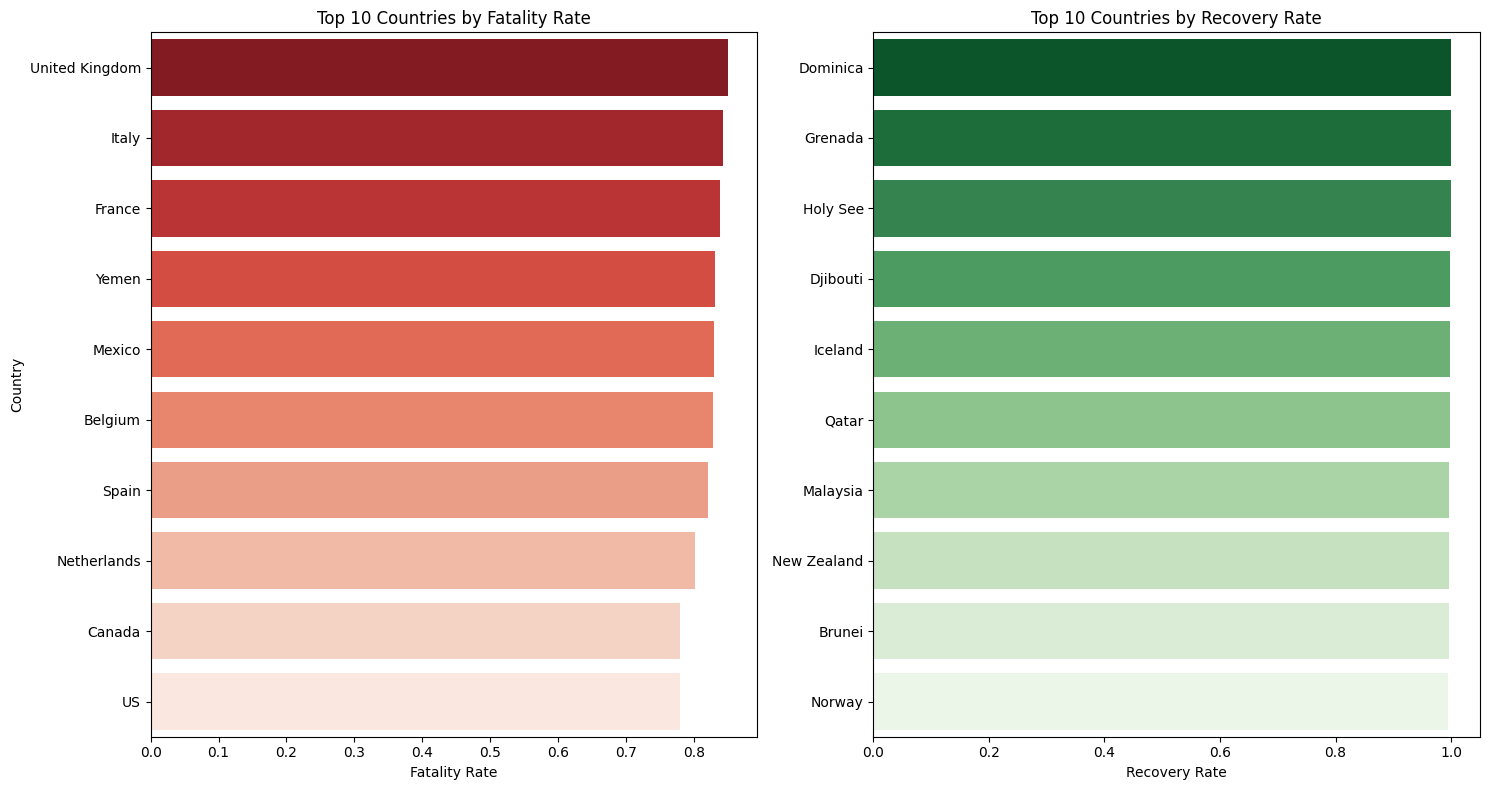

In [601]:
# Calculate recovery and fatality rates for each country
country_stats = full_grouped_df.groupby('Country')[['Confirmed', 'Deaths', 'Recovered']].max()
country_stats['Recovery Rate'] = (country_stats['Recovered'] / country_stats['Confirmed']).fillna(0)
country_stats['Fatality Rate'] = (country_stats['Deaths'] / country_stats['Confirmed']).fillna(0)

# Top 10 countries by fatality rate
top_fatality = country_stats.sort_values('Fatality Rate', ascending=False).head(10)
top_recovery = country_stats.sort_values('Recovery Rate', ascending=False).head(10)



# Subplots for Fatality and Recovery Rates
plt.figure(figsize=(15, 8))

# Top 10 Countries by Fatality Rate
plt.subplot(1, 2, 1)
sns.barplot(x=top_fatality['Fatality Rate'], y=top_fatality.index, palette="Reds_r")
plt.title("Top 10 Countries by Fatality Rate")
plt.xlabel("Fatality Rate")
plt.ylabel("Country")

# Top 10 Countries by Recovery Rate
plt.subplot(1, 2, 2)
sns.barplot(x=top_recovery['Recovery Rate'], y=top_recovery.index, palette="Greens_r")
plt.title("Top 10 Countries by Recovery Rate")
plt.xlabel("Recovery Rate")
plt.ylabel("")

plt.tight_layout()
plt.show()


<ipython-input-602-8443c2b6db14>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-602-8443c2b6db14>:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




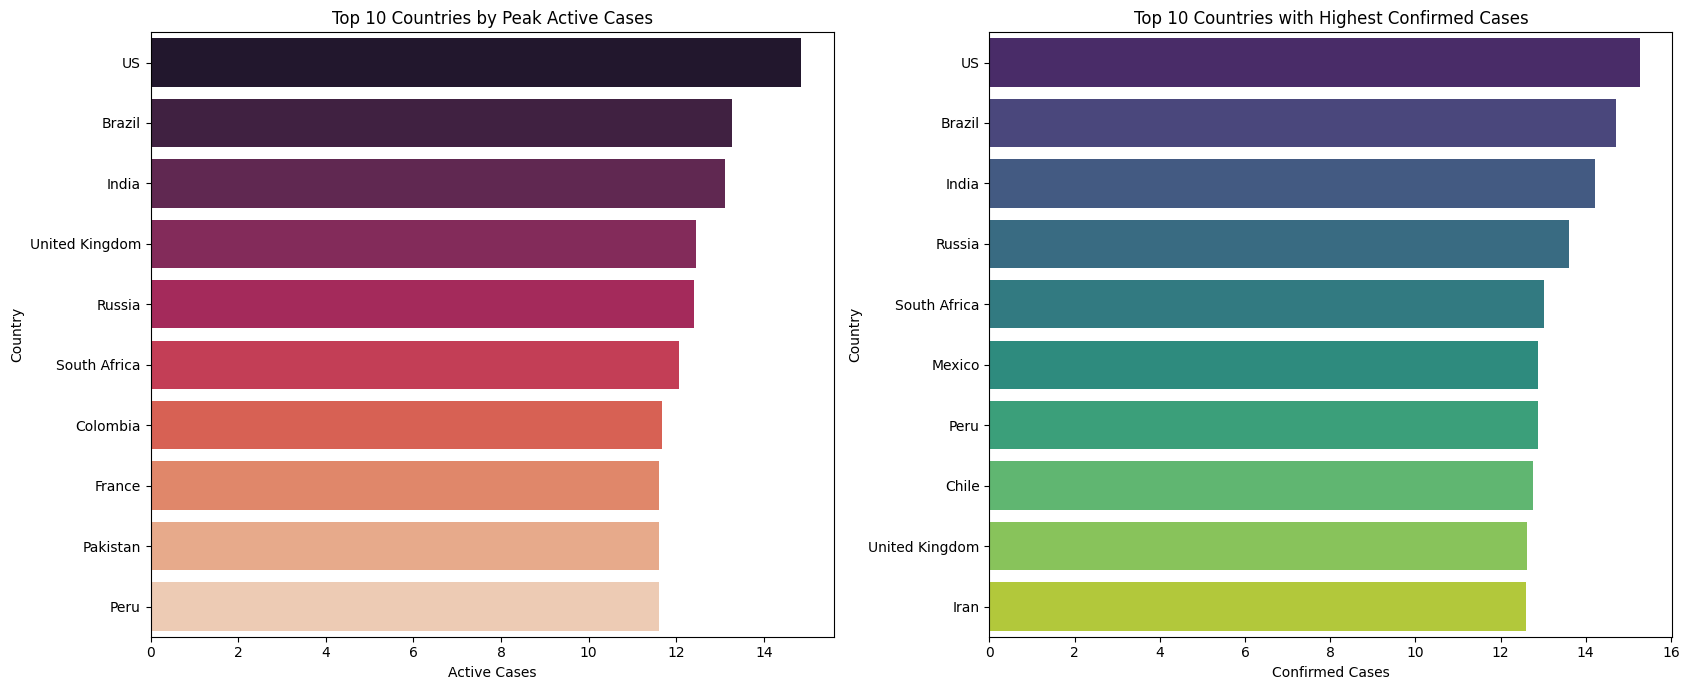

In [602]:
# Distribution of cases across countries

top_active = full_grouped_df.groupby('Country')['Active'].max().sort_values(ascending=False).head(10)
top_countries = full_grouped_df.groupby('Country')['Confirmed'].max().sort_values(ascending=False).head(10)

plt.figure(figsize=(17, 7))
plt.subplot(1, 2, 1)
sns.barplot(x=top_active.values, y=top_active.index, palette="rocket")
plt.title("Top 10 Countries by Peak Active Cases")
plt.xlabel("Active Cases")
plt.ylabel("Country")

plt.subplot(1, 2, 2)
sns.barplot(x=top_countries.values, y=top_countries.index, palette="viridis")
plt.title("Top 10 Countries with Highest Confirmed Cases")
plt.xlabel("Confirmed Cases")
plt.ylabel("Country")
plt.tight_layout()
plt.show()


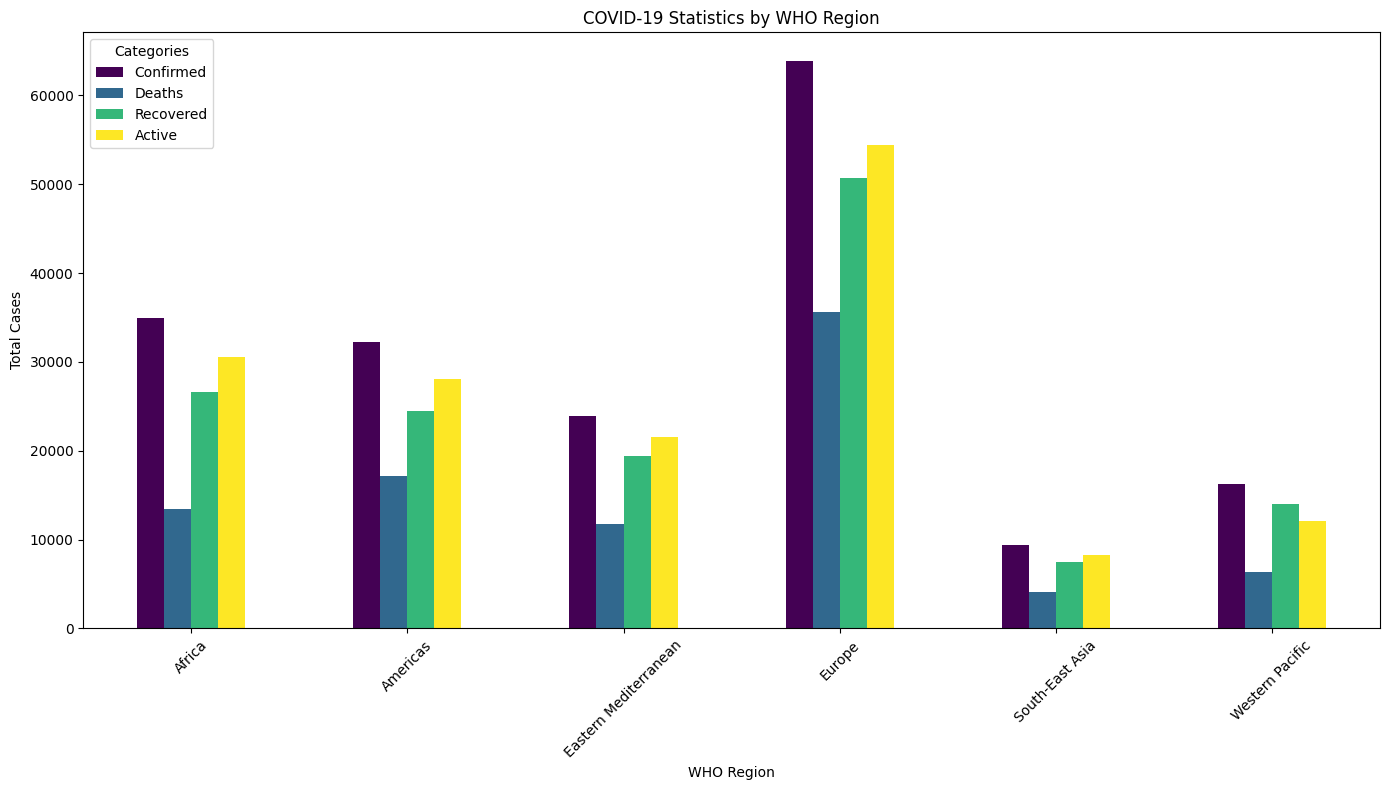

In [603]:
# Group by WHO region and summarize the total statistics
region_stats = full_grouped_df.groupby('WHO Region')[['Confirmed', 'Deaths', 'Recovered', 'Active']].sum()

# Plot the statistics by region
region_stats.plot(kind='bar', figsize=(14,8), stacked=False, colormap='viridis')
plt.title('COVID-19 Statistics by WHO Region')
plt.xlabel("WHO Region")
plt.ylabel('Total Cases')
plt.xticks(rotation=45)
plt.legend(title="Categories", loc='upper left')
plt.tight_layout()
plt.show()



In [604]:

# Calculate recovery and fatality rates
full_grouped_df['Recovery Rate'] = full_grouped_df['Recovered'] / full_grouped_df['Confirmed']
full_grouped_df['Fatality Rate'] = full_grouped_df['Deaths'] / full_grouped_df['Confirmed']

# Fill NaN values in rates (resulting from zero Confirmed cases)
full_grouped_df['Recovery Rate'].fillna(0, inplace=True)
full_grouped_df['Fatality Rate'].fillna(0, inplace=True)


<ipython-input-604-9c9873a6fd11>:6: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



<ipython-input-604-9c9873a6fd11>:7: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or d

##Displaying and Cleaning usa_country_wise_df

In [605]:
usa_county_wise_df.head(10)


,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Date,Confirmed,Deaths
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.271000,-170.132000,"American Samoa, US",1/22/20,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.444300,144.793700,"Guam, US",1/22/20,0,0
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.097900,145.673900,"Northern Mariana Islands, US",1/22/20,0,0
3,63072001,PR,PRI,630,72001.0,Adjuntas,Puerto Rico,US,18.180117,-66.754367,"Adjuntas, Puerto Rico, US",1/22/20,0,0
4,63072003,PR,PRI,630,72003.0,Aguada,Puerto Rico,US,18.360255,-67.175131,"Aguada, Puerto Rico, US",1/22/20,0,0
5,63072005,PR,PRI,630,72005.0,Aguadilla,Puerto Rico,US,18.459681,-67.120815,"Aguadilla, Puerto Rico, US",1/22/20,0,0
6,63072007,PR,PRI,630,72007.0,Aguas Buenas,Puerto Rico,US,18.251619,-66.126806,"Aguas Buenas, Puerto Rico, US",1/22/20,0,0
7,63072009,PR,PRI,630,72009.0,Aibonito,Puerto Rico,US,18.131361,-66.264131,"Aibonito, Puerto Rico, US",1/22/20,0,0
8,63072011,PR,PRI,630,72011.0,Anasco,Puerto Rico,US,18.287985,-67.120611,"Anasco, Puerto Rico, US",1/22/20,0,0
9,63072013,PR,PRI,630,72013.0,Arecibo,Puerto Rico,US,18.406631,-66.675077,"Arecibo, Puerto Rico, US",1/22/20,0,0


In [606]:
usa_county_wise_df.shape

(627920, 14)

In [607]:
usa_county_wise_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 627920 entries, 0 to 627919
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   UID             627920 non-null  int64  
 1   iso2            627920 non-null  object 
 2   iso3            627920 non-null  object 
 3   code3           627920 non-null  int64  
 4   FIPS            626040 non-null  float64
 5   Admin2          626792 non-null  object 
 6   Province_State  627920 non-null  object 
 7   Country_Region  627920 non-null  object 
 8   Lat             627920 non-null  float64
 9   Long_           627920 non-null  float64
 10  Combined_Key    627920 non-null  object 
 11  Date            627920 non-null  object 
 12  Confirmed       627920 non-null  int64  
 13  Deaths          627920 non-null  int64  
dtypes: float64(3), int64(4), object(7)
memory usage: 67.1+ MB


In [608]:
usa_county_wise_df.describe()

,UID,code3,FIPS,Lat,Long_,Confirmed,Deaths
count,6.279200e+05,627920.000000,626040.000000,627920.000000,627920.000000,627920.000000,627920.000000
mean,8.342958e+07,834.491617,33061.684685,36.707212,-88.601474,357.284285,17.536328
std,4.314702e+06,36.492620,18636.156825,9.061572,21.715747,3487.282694,300.991466
min,1.600000e+01,16.000000,60.000000,-14.271000,-174.159600,0.000000,0.000000
25%,8.401811e+07,840.000000,19079.000000,33.895587,-97.790204,0.000000,0.000000
50%,8.402921e+07,840.000000,31014.000000,38.002344,-89.486710,4.000000,0.000000
75%,8.404612e+07,840.000000,47131.000000,41.573069,-82.311265,63.000000,1.000000
max,8.410000e+07,850.000000,99999.000000,69.314792,145.673900,224051.000000,23500.000000


In [609]:
usa_county_wise_df.isnull().sum()

,0
UID,0
iso2,0
iso3,0
code3,0
FIPS,1880
Admin2,1128
Province_State,0
Country_Region,0
Lat,0
Long_,0


In [610]:
usa_county_wise_df.duplicated().sum()

0

In [611]:
usa_county_wise_df = usa_county_wise_df.dropna()

In [612]:
usa_county_wise_df.isnull().sum()

,0
UID,0
iso2,0
iso3,0
code3,0
FIPS,0
Admin2,0
Province_State,0
Country_Region,0
Lat,0
Long_,0


In [613]:
usa_county_wise_df['Date'] = pd.to_datetime(usa_county_wise_df['Date'])

<ipython-input-613-0146e258c278>:1: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



In [614]:
usa_county_wise_df.sort_values(by='Date', inplace=True)
usa_county_wise_df.set_index('Date', inplace=True)

In [615]:
usa_county_wise_df = usa_county_wise_df.rename(columns={'Country_Region': 'Country'})


In [616]:
#usa_county_wise_df = usa_county_wise_df.drop(['UID', 'iso2', 'iso3', 'code3', 'FIPS'], axis=1)


In [617]:
# Check for logical inconsistencies
usa_county_wise_df = usa_county_wise_df[usa_county_wise_df['Confirmed'] >= usa_county_wise_df['Deaths'] ]

In [618]:
usa_county_wise_df


,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country,Lat,Long_,Combined_Key,Confirmed,Deaths
Date,,,,,,,,,,,,,
2020-01-22,63072001,PR,PRI,630,72001.0,Adjuntas,Puerto Rico,US,18.180117,-66.754367,"Adjuntas, Puerto Rico, US",0,0
2020-01-22,84040003,US,USA,840,40003.0,Alfalfa,Oklahoma,US,36.730906,-98.324085,"Alfalfa, Oklahoma, US",0,0
2020-01-22,84040005,US,USA,840,40005.0,Atoka,Oklahoma,US,34.373666,-96.038025,"Atoka, Oklahoma, US",0,0
2020-01-22,84040007,US,USA,840,40007.0,Beaver,Oklahoma,US,36.749685,-100.475887,"Beaver, Oklahoma, US",0,0
2020-01-22,84040009,US,USA,840,40009.0,Beckham,Oklahoma,US,35.268624,-99.681280,"Beckham, Oklahoma, US",0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-27,84021079,US,USA,840,21079.0,Garrard,Kentucky,US,37.638867,-84.532893,"Garrard, Kentucky, US",59,0
2020-07-27,84021081,US,USA,840,21081.0,Grant,Kentucky,US,38.649628,-84.624160,"Grant, Kentucky, US",85,5
2020-07-27,84021083,US,USA,840,21083.0,Graves,Kentucky,US,36.722925,-88.651433,"Graves, Kentucky, US",435,21


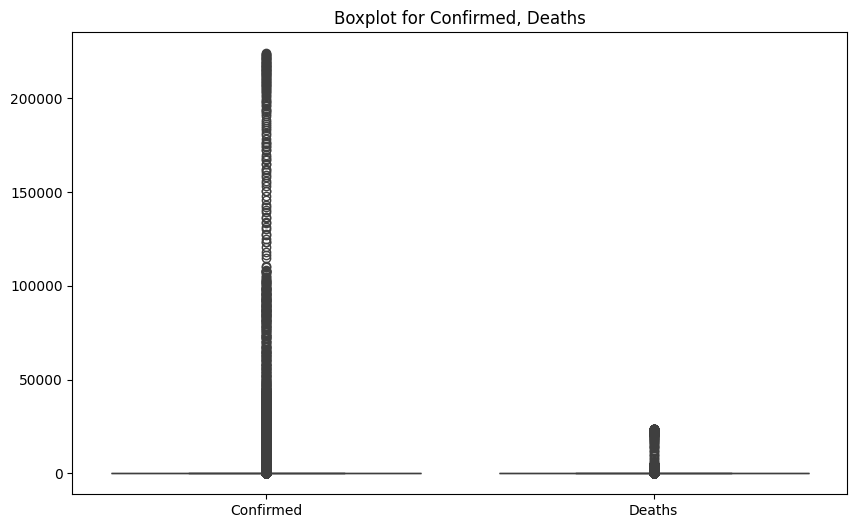

In [619]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=usa_county_wise_df[['Confirmed', 'Deaths']])
plt.title('Boxplot for Confirmed, Deaths')
plt.show()

In [620]:
# Columns to apply log transformation
columns_to_transform = ['Confirmed', 'Deaths']

# Apply log transformation (log1p to handle zero values)
for col in columns_to_transform:
    usa_county_wise_df[col] = usa_county_wise_df[col].apply(lambda x: np.log1p(x))  # log1p(x) = log(x + 1)


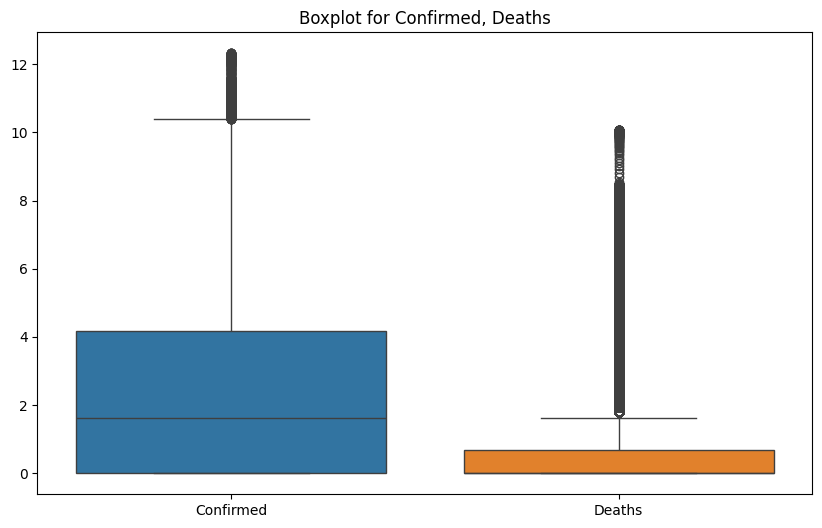

In [621]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=usa_county_wise_df[['Confirmed', 'Deaths']])
plt.title('Boxplot for Confirmed, Deaths')
plt.show()

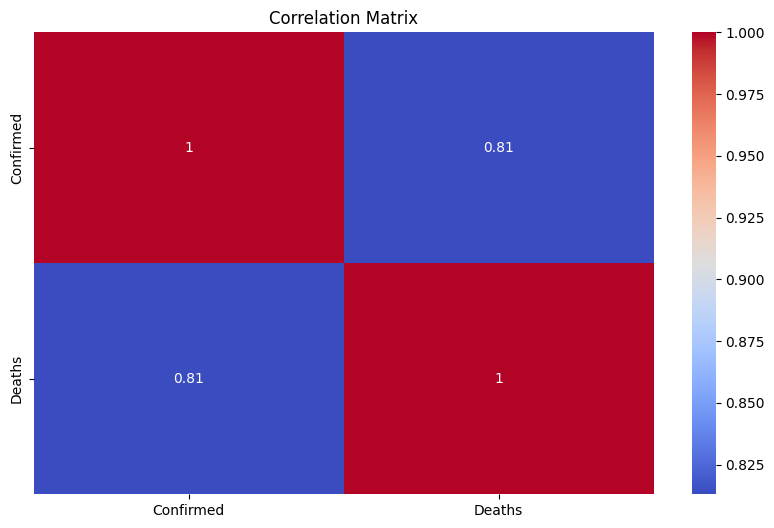

In [622]:
plt.figure(figsize=(10, 6))

sns.heatmap(usa_county_wise_df[['Confirmed', 'Deaths']].corr(), annot=True, cmap='coolwarm')

plt.title('Correlation Matrix')

plt.show()

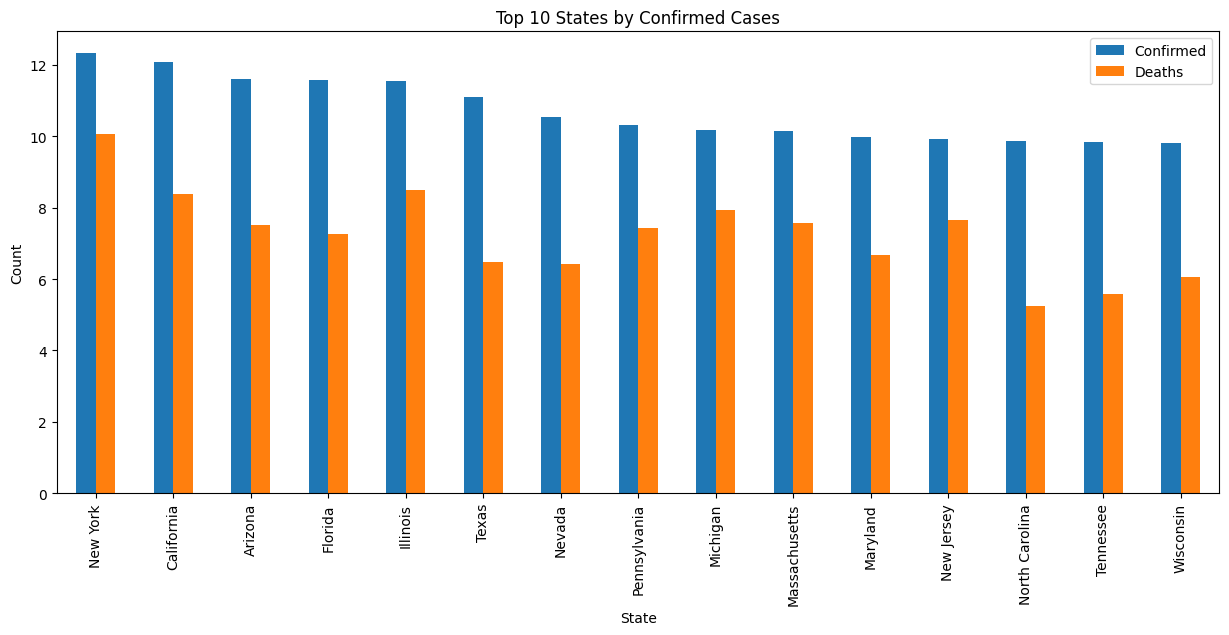

In [623]:

# Confirmed vs Deaths plot by state
state_data = usa_county_wise_df.groupby('Province_State')[['Confirmed', 'Deaths']].max().sort_values('Confirmed', ascending=False)
state_data.head(15).plot(kind='bar', figsize=(15, 6))
plt.title('Top 10 States by Confirmed Cases')
plt.ylabel('Count')
plt.xlabel('State')
plt.show()


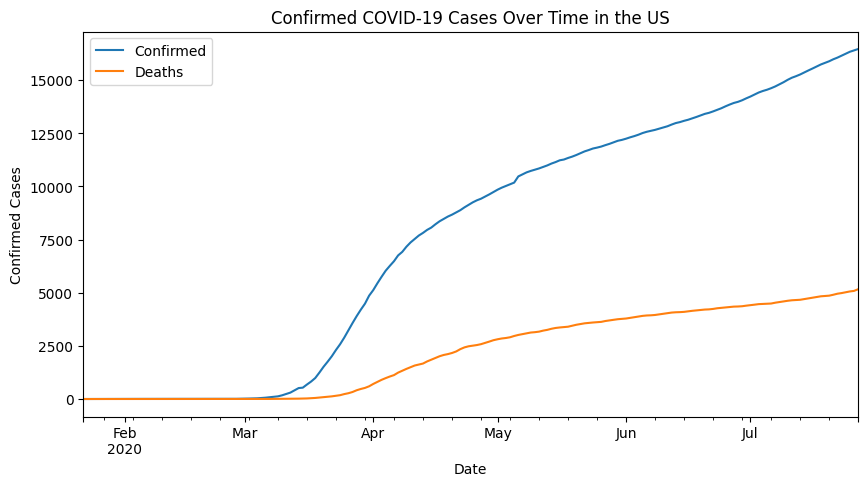

In [624]:

# Plot the trend of Confirmed cases over time
usa_county_wise_df.groupby('Date')[['Confirmed','Deaths']].sum().plot(figsize=(10, 5))
plt.title('Confirmed COVID-19 Cases Over Time in the US')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.show()




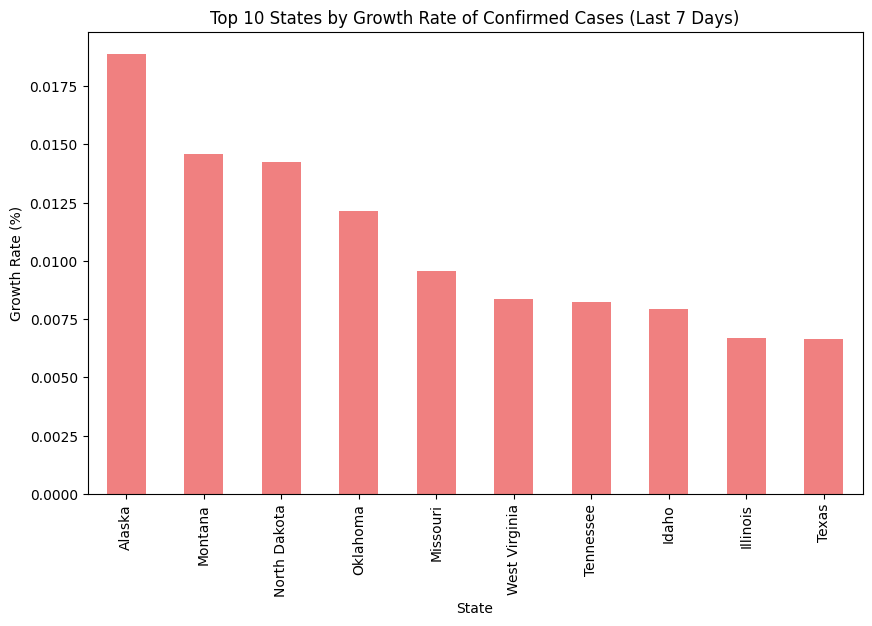

In [625]:
# Calculate growth rate for each state
state_growth_rate = usa_county_wise_df.groupby(['Province_State', 'Date'])['Confirmed'].sum().groupby('Province_State').pct_change().fillna(0)

# Top 10 states with highest growth rate in the last 7 days
top_10_growth = state_growth_rate.groupby('Province_State').tail(7).groupby('Province_State').mean().sort_values(ascending=False).head(10) # Remove ['Confirmed'] as it's not a column in the Series
top_10_growth.plot(kind='bar', figsize=(10, 6), color='lightcoral')
plt.title('Top 10 States by Growth Rate of Confirmed Cases (Last 7 Days)')
plt.ylabel('Growth Rate (%)')
plt.xlabel('State')
plt.show()

In [626]:

# Calculate fatality rates
usa_county_wise_df['Fatality Rate'] = usa_county_wise_df['Deaths'] / usa_county_wise_df['Confirmed']

# Fill NaN values in rates (resulting from zero Confirmed cases)
usa_county_wise_df['Fatality Rate'].fillna(0, inplace=True)

<ipython-input-626-31db47d1c9ab>:5: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





##Displaying and cleaning worldmeter_df

In [627]:
worldometer_df.head(10)

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,3.311981e+08,5032179,NaN,162804.0,NaN,2576668.0,NaN,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas
1,Brazil,South America,2.127107e+08,2917562,NaN,98644.0,NaN,2047660.0,NaN,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas
2,India,Asia,1.381345e+09,2025409,NaN,41638.0,NaN,1377384.0,NaN,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia
3,Russia,Europe,1.459409e+08,871894,NaN,14606.0,NaN,676357.0,NaN,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe
4,South Africa,Africa,5.938157e+07,538184,NaN,9604.0,NaN,387316.0,NaN,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa
5,Mexico,North America,1.290662e+08,462690,6590.0,50517.0,819.0,308848.0,4140.0,103325.0,3987.0,3585.0,391.0,1056915.0,8189.0,Americas
6,Peru,South America,3.301632e+07,455409,NaN,20424.0,NaN,310337.0,NaN,124648.0,1426.0,13793.0,619.0,2493429.0,75521.0,Americas
7,Chile,South America,1.913251e+07,366671,NaN,9889.0,NaN,340168.0,NaN,16614.0,1358.0,19165.0,517.0,1760615.0,92022.0,Americas
8,Colombia,South America,5.093626e+07,357710,NaN,11939.0,NaN,192355.0,NaN,153416.0,1493.0,7023.0,234.0,1801835.0,35374.0,Americas
9,Spain,Europe,4.675665e+07,354530,NaN,28500.0,NaN,NaN,NaN,NaN,617.0,7582.0,610.0,7064329.0,151087.0,Europe


In [628]:
worldometer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country/Region    209 non-null    object 
 1   Continent         208 non-null    object 
 2   Population        208 non-null    float64
 3   TotalCases        209 non-null    int64  
 4   NewCases          4 non-null      float64
 5   TotalDeaths       188 non-null    float64
 6   NewDeaths         3 non-null      float64
 7   TotalRecovered    205 non-null    float64
 8   NewRecovered      3 non-null      float64
 9   ActiveCases       205 non-null    float64
 10  Serious,Critical  122 non-null    float64
 11  Tot Cases/1M pop  208 non-null    float64
 12  Deaths/1M pop     187 non-null    float64
 13  TotalTests        191 non-null    float64
 14  Tests/1M pop      191 non-null    float64
 15  WHO Region        184 non-null    object 
dtypes: float64(12), int64(1), object(3)
memory u

In [629]:
worldometer_df.describe()


,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop
count,2.080000e+02,2.090000e+02,4.000000,188.000000,3.000000,2.050000e+02,3.000000,2.050000e+02,122.000000,208.000000,187.000000,1.910000e+02,191.000000
mean,3.041549e+07,9.171850e+04,1980.500000,3792.590426,300.000000,5.887898e+04,1706.000000,2.766433e+04,534.393443,3196.024038,98.681176,1.402405e+06,83959.366492
std,1.047661e+08,4.325867e+05,3129.611424,15487.184877,451.199512,2.566984e+05,2154.779803,1.746327e+05,2047.518613,5191.986457,174.956862,5.553367e+06,152730.591240
min,8.010000e+02,1.000000e+01,20.000000,1.000000,1.000000,7.000000e+00,42.000000,0.000000e+00,1.000000,3.000000,0.080000,6.100000e+01,4.000000
25%,9.663140e+05,7.120000e+02,27.500000,22.000000,40.500000,3.340000e+02,489.000000,8.600000e+01,3.250000,282.000000,6.000000,2.575200e+04,8956.500000
50%,7.041972e+06,4.491000e+03,656.000000,113.000000,80.000000,2.178000e+03,936.000000,8.990000e+02,27.500000,1015.000000,29.000000,1.357020e+05,32585.000000
75%,2.575614e+07,3.689600e+04,2609.000000,786.000000,449.500000,2.055300e+04,2538.000000,7.124000e+03,160.250000,3841.750000,98.000000,7.576960e+05,92154.500000
max,1.381345e+09,5.032179e+06,6590.000000,162804.000000,819.000000,2.576668e+06,4140.000000,2.292707e+06,18296.000000,39922.000000,1238.000000,6.313960e+07,995282.000000


In [630]:
worldometer_df.isnull().sum()

,0
Country/Region,0
Continent,1
Population,1
TotalCases,0
NewCases,205
TotalDeaths,21
NewDeaths,206
TotalRecovered,4
NewRecovered,206
ActiveCases,4


In [631]:
worldometer_df.duplicated().sum()

0

In [632]:
worldometer_df = worldometer_df.drop(columns=['NewRecovered', 'NewDeaths', 'NewCases'])

In [633]:
worldometer_df = worldometer_df.dropna(subset=['Continent', 'Population'])


In [634]:
worldometer_df['TotalDeaths'] = worldometer_df['TotalDeaths'].fillna(worldometer_df['TotalDeaths'].median())
worldometer_df['TotalRecovered'] = worldometer_df['TotalRecovered'].fillna(worldometer_df['TotalRecovered'].median())
worldometer_df['ActiveCases'] = worldometer_df['ActiveCases'].fillna(worldometer_df['ActiveCases'].median())
worldometer_df['Serious,Critical'] = worldometer_df['Serious,Critical'].fillna(0)
worldometer_df['Tot Cases/1M pop'] = worldometer_df['Tot Cases/1M pop'].fillna(worldometer_df['TotalCases'] / worldometer_df['Population'] * 1_000_000)
worldometer_df['Deaths/1M pop'] = worldometer_df['Deaths/1M pop'].fillna(worldometer_df['TotalDeaths'] / worldometer_df['Population'] * 1_000_000)
worldometer_df['TotalTests'] = worldometer_df['TotalTests'].fillna(worldometer_df['TotalTests'].median())
worldometer_df['Tests/1M pop'] = worldometer_df['Tests/1M pop'].fillna(worldometer_df['TotalTests'] / worldometer_df['Population'] * 1_000_000)


In [635]:
# Handling negative or zero values (if any)
worldometer_df['TotalCases'] = worldometer_df['TotalCases'].apply(lambda x: max(x, 0))
worldometer_df['TotalDeaths'] = worldometer_df['TotalDeaths'].apply(lambda x: max(x, 0))
worldometer_df['TotalRecovered'] = worldometer_df['TotalRecovered'].apply(lambda x: max(x, 0))
worldometer_df['TotalTests'] = worldometer_df['TotalTests'].apply(lambda x: max(x, 0))


In [636]:
# Drop irrelevant columns
#worldometer_df.drop(columns=['Serious,Critical'], inplace=True)


In [637]:
worldometer_df['WHO Region'] = worldometer_df.groupby('Continent')['WHO Region'].transform(
    lambda x: x.fillna(x.mode()[0]) if not x.mode().empty else x
)

In [638]:
worldometer_df.isnull().sum()

,0
Country/Region,0
Continent,0
Population,0
TotalCases,0
TotalDeaths,0
TotalRecovered,0
ActiveCases,0
"Serious,Critical",0
Tot Cases/1M pop,0
Deaths/1M pop,0


In [639]:
worldometer_df.rename(columns={'Country/Region': 'Country','TotalCases':'Confirmed','TotalDeaths':'Deaths','TotalRecovered':'Recovered','ActiveCases':'Active,'}, inplace=True)

In [640]:
# Check for logical inconsistencies
worldometer_df = worldometer_df[worldometer_df['Confirmed'] >= worldometer_df['Deaths'] + worldometer_df['Recovered']]

In [641]:
worldometer_df

,Country,Continent,Population,Confirmed,Deaths,Recovered,"Active,","Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,3.311981e+08,5032179,162804.0,2576668.0,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.000000,Americas
1,Brazil,South America,2.127107e+08,2917562,98644.0,2047660.0,771258.0,8318.0,13716.0,464.0,13206188.0,62085.000000,Americas
2,India,Asia,1.381345e+09,2025409,41638.0,1377384.0,606387.0,8944.0,1466.0,30.0,22149351.0,16035.000000,South-EastAsia
3,Russia,Europe,1.459409e+08,871894,14606.0,676357.0,180931.0,2300.0,5974.0,100.0,29716907.0,203623.000000,Europe
4,South Africa,Africa,5.938157e+07,538184,9604.0,387316.0,141264.0,539.0,9063.0,162.0,3149807.0,53044.000000,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,Saint Martin,North America,3.872900e+04,53,3.0,41.0,9.0,1.0,1368.0,77.0,1183.0,30546.000000,Americas
194,Curaçao,North America,1.641610e+05,31,1.0,28.0,2.0,0.0,189.0,6.0,1080.0,6579.000000,Americas
195,Fiji,Australia/Oceania,8.970950e+05,27,1.0,18.0,8.0,0.0,30.0,1.0,6693.0,7461.000000,WesternPacific
204,Montserrat,North America,4.992000e+03,13,1.0,10.0,2.0,0.0,2604.0,200.0,61.0,12220.000000,Americas


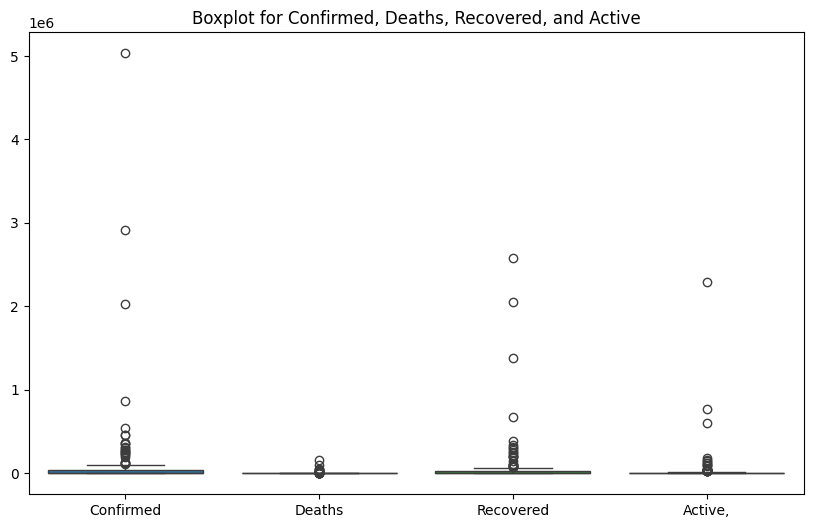

In [642]:
plt.figure(figsize=(10, 6))

# Replace 'Active' with 'Active,' in the columns list
sns.boxplot(data=worldometer_df[['Confirmed', 'Deaths', 'Recovered', 'Active,']])

plt.title('Boxplot for Confirmed, Deaths, Recovered, and Active')

plt.show()

In [643]:
# Columns to apply log transformation
columns_to_transform = ['Confirmed', 'Deaths','Recovered','TotalTests']

# Apply log transformation (log1p to handle zero values)
for col in columns_to_transform:
    worldometer_df[col] = worldometer_df[col].apply(lambda x: np.log1p(x))  # log1p(x) = log(x + 1)


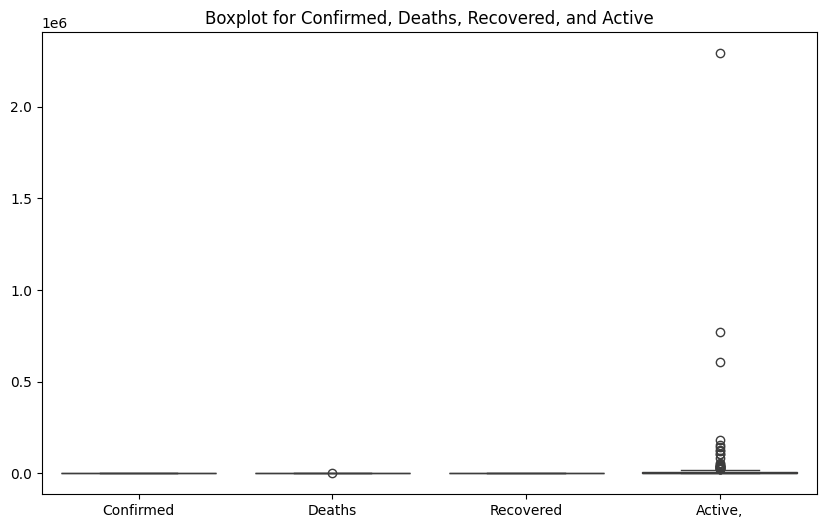

In [644]:
plt.figure(figsize=(10, 6))

# Replace 'Active' with 'Active,' in the columns list
sns.boxplot(data=worldometer_df[['Confirmed', 'Deaths', 'Recovered', 'Active,']])

plt.title('Boxplot for Confirmed, Deaths, Recovered, and Active')

plt.show()

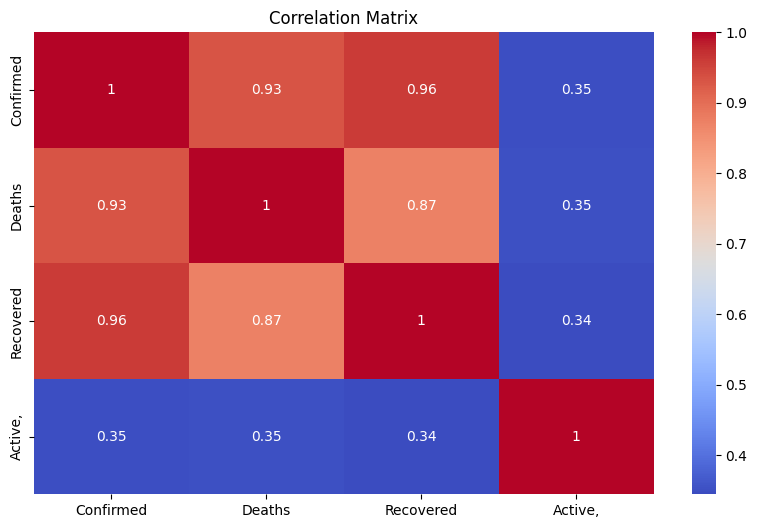

In [645]:
plt.figure(figsize=(10, 6))

sns.heatmap(worldometer_df[['Confirmed', 'Deaths', 'Recovered', 'Active,']].corr(), annot=True, cmap='coolwarm')

plt.title('Correlation Matrix')

plt.show()

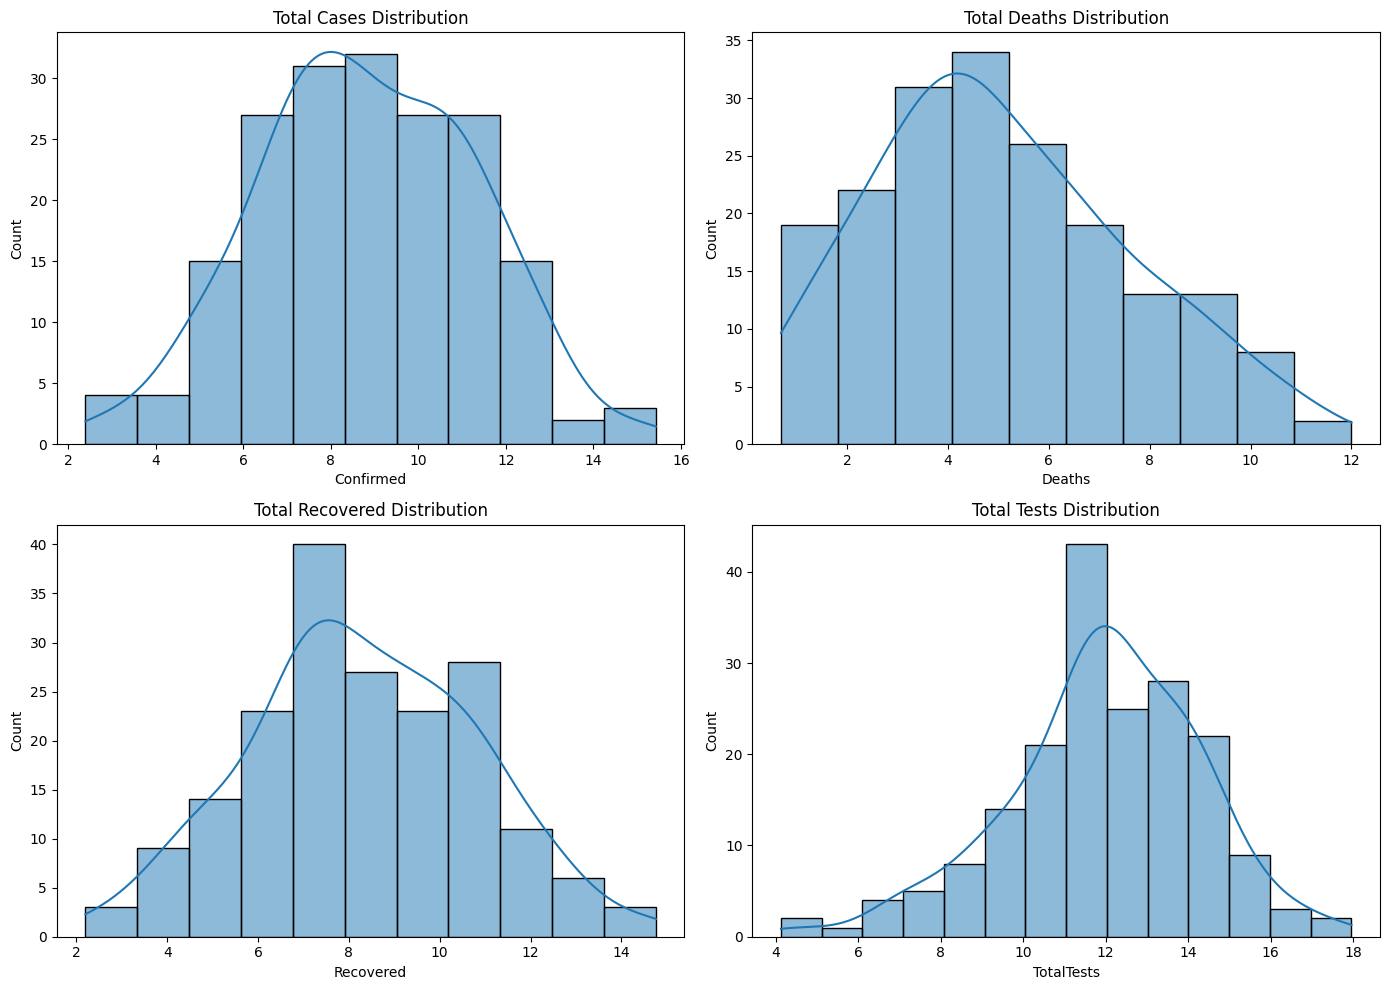

In [646]:

import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the distribution of key metrics
fig, ax = plt.subplots(2, 2, figsize=(14, 10))

sns.histplot(worldometer_df['Confirmed'], ax=ax[0, 0], kde=True).set_title('Total Cases Distribution')
sns.histplot(worldometer_df['Deaths'], ax=ax[0, 1], kde=True).set_title('Total Deaths Distribution')
sns.histplot(worldometer_df['Recovered'], ax=ax[1, 0], kde=True).set_title('Total Recovered Distribution')
sns.histplot(worldometer_df['TotalTests'], ax=ax[1, 1], kde=True).set_title('Total Tests Distribution')

plt.tight_layout()
plt.show()


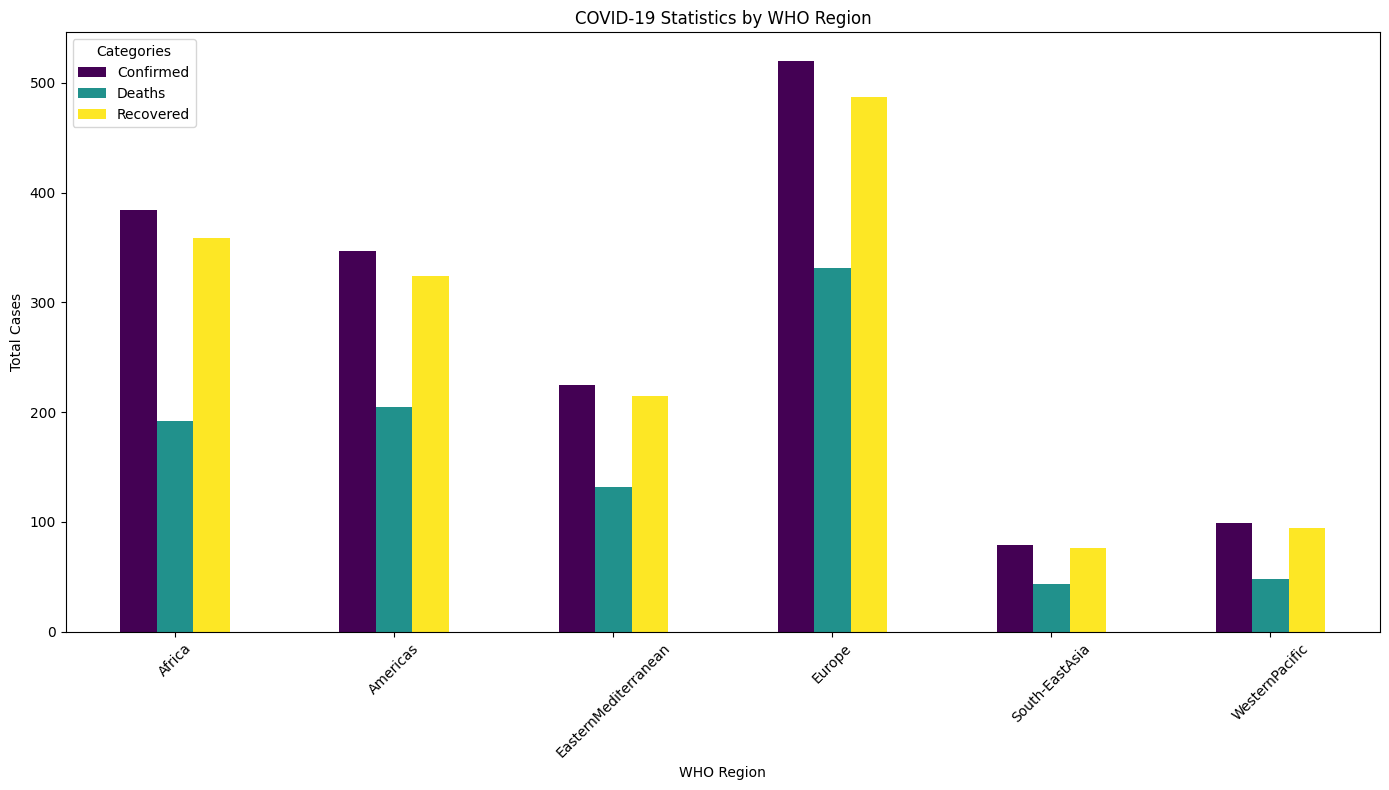

In [647]:
# Group by WHO region and summarize the total statistics
region_stats = worldometer_df.groupby('WHO Region')[['Confirmed', 'Deaths', 'Recovered']].sum()

# Plot the statistics by region
region_stats.plot(kind='bar', figsize=(14,8), stacked=False, colormap='viridis')
plt.title('COVID-19 Statistics by WHO Region')
plt.xlabel("WHO Region")
plt.ylabel('Total Cases')
plt.xticks(rotation=45)
plt.legend(title="Categories", loc='upper left')
plt.tight_layout()
plt.show()



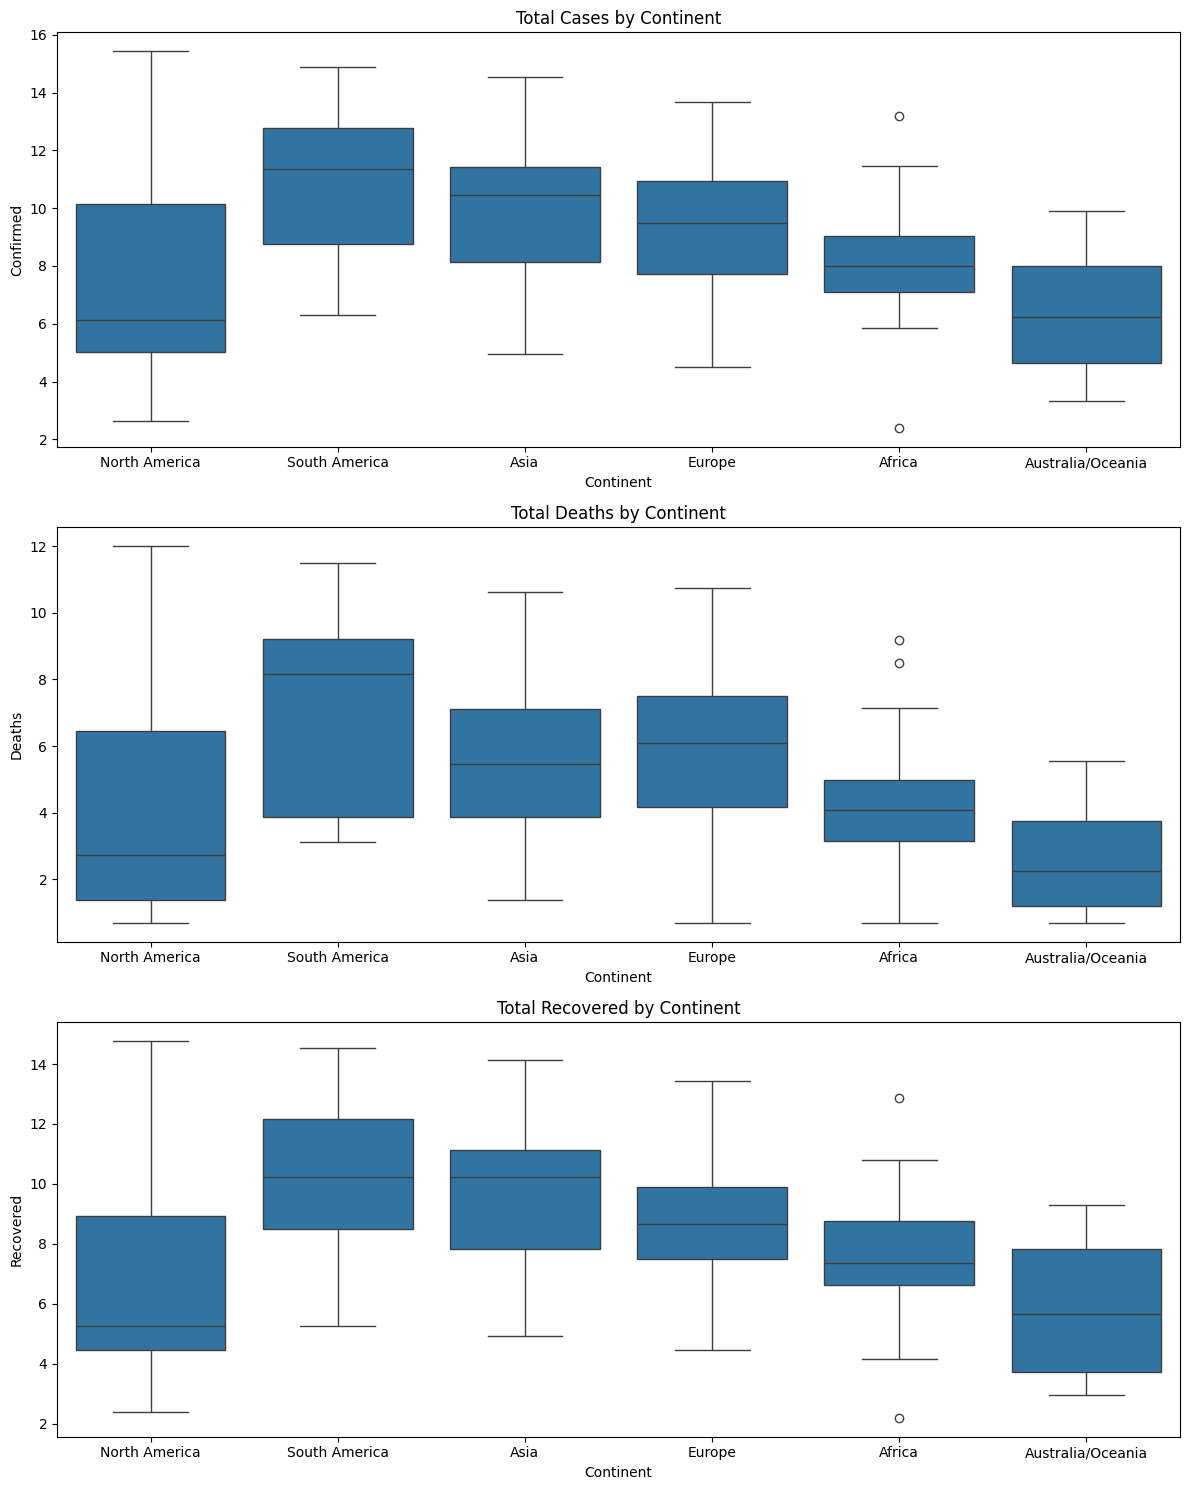

In [648]:
# Plotting distributions of Total Cases, Deaths, and Recovered by Continent
fig, ax = plt.subplots(3, 1, figsize=(12, 15))

sns.boxplot(x='Continent', y='Confirmed', data=worldometer_df, ax=ax[0]).set_title('Total Cases by Continent')
sns.boxplot(x='Continent', y='Deaths', data=worldometer_df, ax=ax[1]).set_title('Total Deaths by Continent')
sns.boxplot(x='Continent', y='Recovered', data=worldometer_df, ax=ax[2]).set_title('Total Recovered by Continent')

plt.tight_layout()
plt.show()


<ipython-input-649-d43653a45786>:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-649-d43653a45786>:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-649-d43653a45786>:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-649-d43653a45786>:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




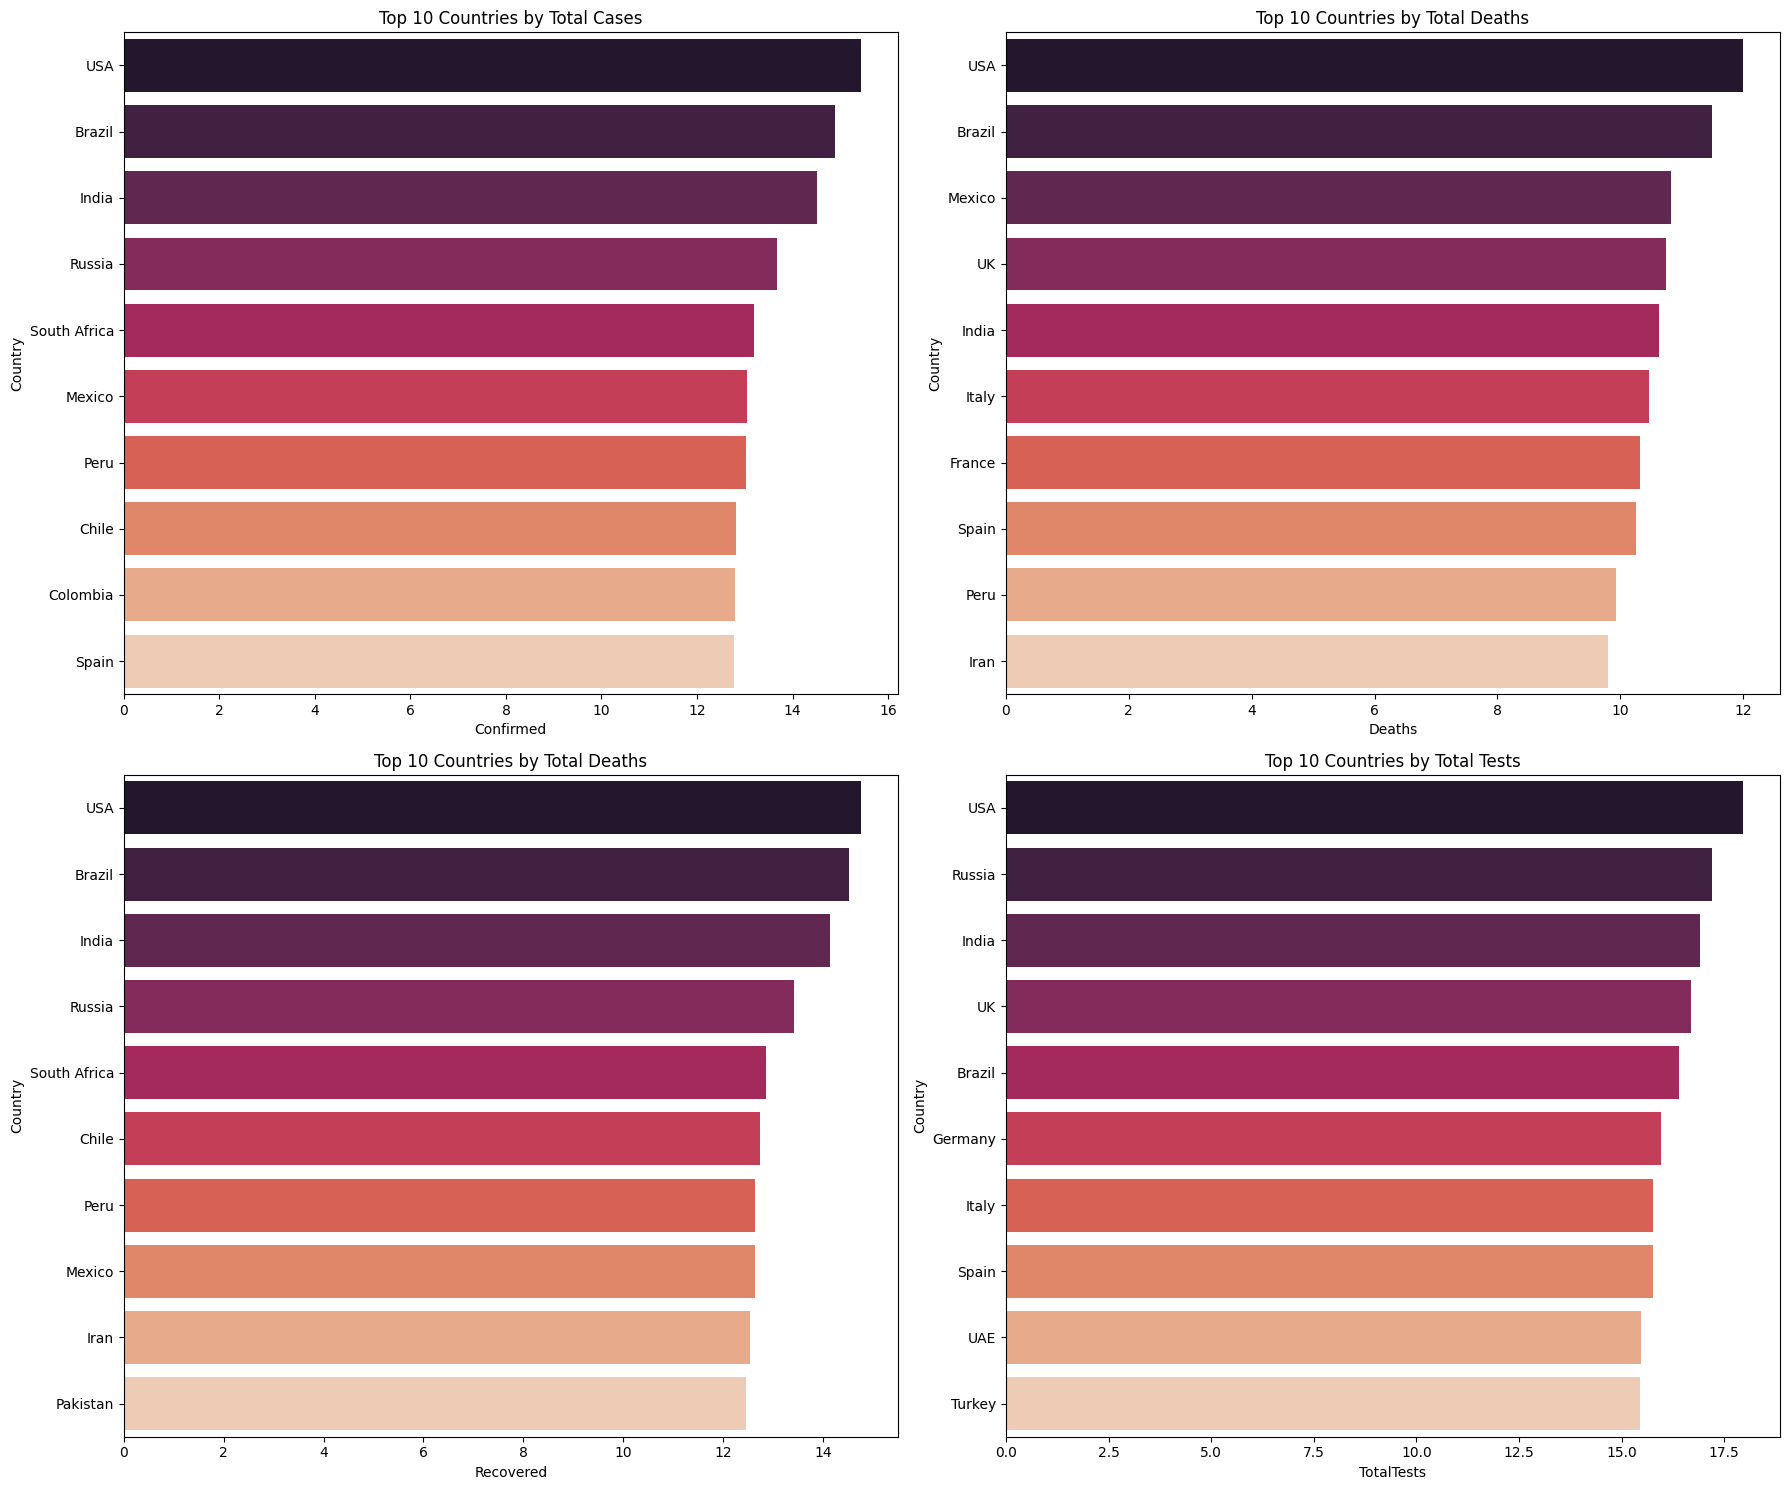

In [649]:
# Top 10 countries by Total Cases
top_cases = worldometer_df.sort_values(by='Confirmed', ascending=False).head(10)
top_deaths = worldometer_df.sort_values(by='Deaths', ascending=False).head(10)
top_recovered = worldometer_df.sort_values(by='Recovered', ascending=False).head(10)
top_tests = worldometer_df.sort_values(by='TotalTests', ascending=False).head(10)

# Plotting
fig, ax = plt.subplots(2, 2, figsize=(18, 15))

sns.barplot(x='Confirmed', y='Country', data=top_cases, ax=ax[0,0],palette="rocket").set_title('Top 10 Countries by Total Cases')
sns.barplot(x='Deaths', y='Country', data=top_deaths, ax=ax[0,1],palette="rocket").set_title('Top 10 Countries by Total Deaths')
sns.barplot(x='Recovered', y='Country', data=top_recovered, ax=ax[1,0],palette="rocket").set_title('Top 10 Countries by Total Deaths')
sns.barplot(x='TotalTests', y='Country', data=top_tests, ax=ax[1,1],palette="rocket").set_title('Top 10 Countries by Total Tests')

plt.tight_layout()
plt.show()


<ipython-input-650-0cf94e2ebc09>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




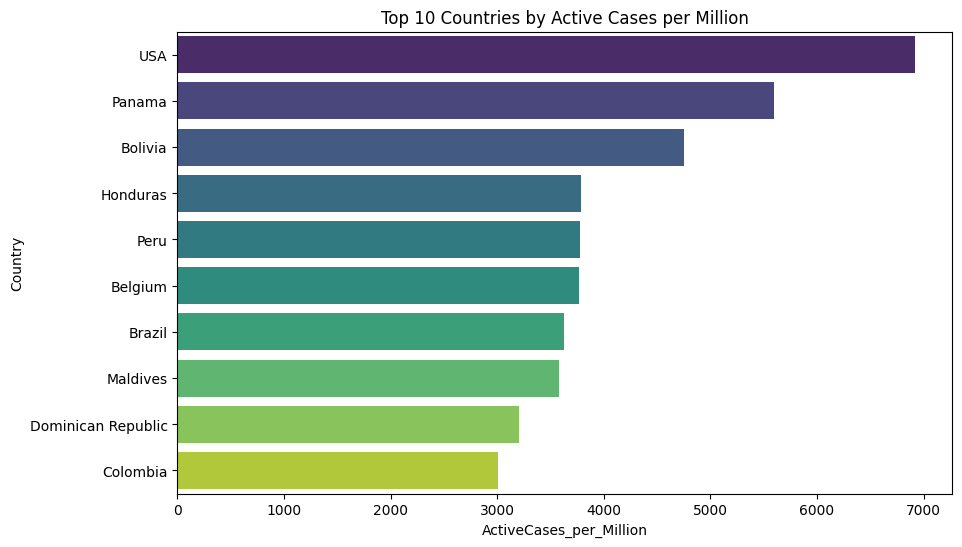

In [650]:
# Active cases per million people
worldometer_df['ActiveCases_per_Million'] = (worldometer_df['Active,'] / worldometer_df['Population']) * 1e6

# Plotting Active Cases per Million
top_active_cases = worldometer_df[['Country', 'ActiveCases_per_Million']].sort_values(by='ActiveCases_per_Million', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='ActiveCases_per_Million', y='Country', data=top_active_cases,palette="viridis").set_title('Top 10 Countries by Active Cases per Million')
plt.show()


<ipython-input-651-437d6d559958>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




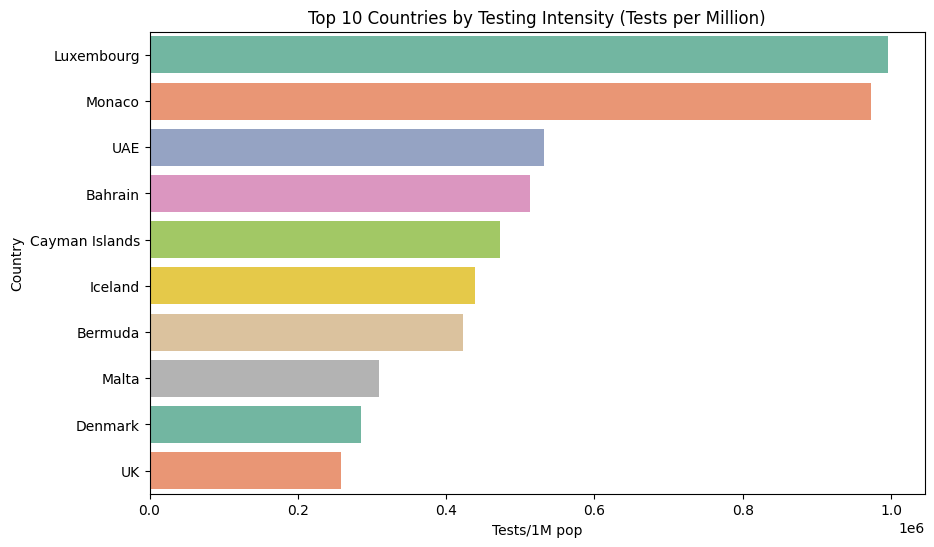

In [651]:
# Plotting top 10 countries by Testing Intensity
top_tests_per_million = worldometer_df[['Country', 'Tests/1M pop']].sort_values(by='Tests/1M pop', ascending=False).head(10)

plt.figure(figsize=(10, 6))
# Move the palette argument to the sns.barplot function
sns.barplot(x='Tests/1M pop', y='Country', data=top_tests_per_million, palette="Set2").set_title('Top 10 Countries by Testing Intensity (Tests per Million)')
plt.show()

In [652]:

# Calculate recovery and fatality rates
worldometer_df['Recovery Rate'] = worldometer_df['Recovered'] / worldometer_df['Confirmed']
worldometer_df['Fatality Rate'] = worldometer_df['Deaths'] / worldometer_df['Confirmed']

# Fill NaN values in rates (resulting from zero Confirmed cases)
worldometer_df['Recovery Rate'].fillna(0, inplace=True)
worldometer_df['Fatality Rate'].fillna(0, inplace=True)


<ipython-input-652-c7217c15d265>:6: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



<ipython-input-652-c7217c15d265>:7: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or d

##MERGING DATASETS

In [653]:
#print the head and info of each of the 6 dataframes

print("Head of full_grouped_df:")
print(full_grouped_df.head())
print("\nInfo of full_grouped_df:")
print(full_grouped_df.info())
print("\nHead of usa_county_wise_df:")
print(usa_county_wise_df.head())
print("\nInfo of usa_county_wise_df:")
print(usa_county_wise_df.info())
print("\nHead of worldometer_df:")
print(worldometer_df.head())
print("\nInfo of worldometer_df:")
print(worldometer_df.info())
print("Head of Day_wise_df:")
print(Day_wise_df.head())
print("\nInfo of Day_wise_df:")
print(Day_wise_df.info())
print("Head of country_wise_latest:")
print(country_wise_df.head())
print("\nInfo of country_wise_latest:")
print(country_wise_df.info())
print("Head of covid_19_clean_complete:")
print(covid_complete_df.head())
print("\nInfo of covid_19_clean_complete:")
print(covid_complete_df.info())






Head of full_grouped_df:
                Country  Confirmed  Deaths  Recovered  Active  New cases  \
Date                                                                       
2020-01-22  Afghanistan        0.0     0.0        0.0     0.0        0.0   
2020-01-22  Netherlands        0.0     0.0        0.0     0.0        0.0   
2020-01-22  New Zealand        0.0     0.0        0.0     0.0        0.0   
2020-01-22    Nicaragua        0.0     0.0        0.0     0.0        0.0   
2020-01-22        Niger        0.0     0.0        0.0     0.0        0.0   

            New deaths  New recovered             WHO Region  Recovery Rate  \
Date                                                                          
2020-01-22           0              0  Eastern Mediterranean            0.0   
2020-01-22           0              0                 Europe            0.0   
2020-01-22           0              0        Western Pacific            0.0   
2020-01-22           0              0          

In [654]:
merged_df1 = full_grouped_df.reset_index().merge(
    worldometer_df,
    on="Country",
    how="inner"
).set_index("Date")


In [655]:
merged_df1

,Country,Confirmed_x,Deaths_x,Recovered_x,Active,New cases,New deaths,New recovered,WHO Region_x,Recovery Rate_x,...,"Active,","Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region_y,ActiveCases_per_Million,Recovery Rate_y,Fatality Rate_y
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-22,Afghanistan,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,Eastern Mediterranean,0.000000,...,9758.0,31.0,946.0,33.0,11.411966,2317.000000,EasternMediterranean,250.144536,0.966130,0.681764
2020-01-22,Netherlands,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,Europe,0.000000,...,900.5,37.0,3325.0,359.0,13.892343,63007.000000,Europe,52.541736,0.702026,0.796754
2020-01-22,New Zealand,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,Western Pacific,0.000000,...,23.0,0.0,314.0,4.0,13.095904,97348.000000,WesternPacific,4.598069,0.996048,0.426086
2020-01-22,Nicaragua,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,Americas,0.000000,...,866.0,0.0,588.0,19.0,11.818224,20460.889443,Americas,130.573833,0.964663,0.582899
2020-01-22,Niger,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,Africa,0.000000,...,27.0,0.0,47.0,3.0,9.110851,373.000000,Africa,1.111961,0.987682,0.602539
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-27,Georgia,7.037028,2.833213,6.827629,5.298317,1.945910,0,2,Europe,0.970243,...,202.0,0.0,302.0,4.0,12.390367,60294.000000,Europe,50.647282,0.971785,0.407330
2020-07-27,Germany,12.241020,9.118883,12.156436,8.945593,6.100319,1,259,Europe,0.993090,...,9758.0,236.0,2568.0,110.0,15.965719,102452.000000,Europe,116.428270,0.992469,0.743743
2020-07-27,Ghana,10.423025,5.129899,10.302331,8.204125,6.486161,0,307,Africa,0.988420,...,3059.0,7.0,1273.0,6.0,12.913660,13035.000000,Africa,98.254346,0.991900,0.500423


In [656]:
merged_df1.isnull().sum()

,0
Country,0
Confirmed_x,0
Deaths_x,0
Recovered_x,0
Active,0
New cases,0
New deaths,0
New recovered,0
WHO Region_x,0
Recovery Rate_x,0


In [657]:
merged_df2 = usa_county_wise_df.reset_index().merge(
    full_grouped_df.reset_index(),
    on=["Country", "Date"],
    how="left"
).set_index("Date")


In [658]:
merged_df2

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country,Lat,Long_,...,Confirmed_y,Deaths_y,Recovered,Active,New cases,New deaths,New recovered,WHO Region,Recovery Rate,Fatality Rate_y
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-22,63072001,PR,PRI,630,72001.0,Adjuntas,Puerto Rico,US,18.180117,-66.754367,...,0.693147,0.000000,0.00000,0.693147,0.000000,0,0,Americas,0.000000,0.000000
2020-01-22,84040003,US,USA,840,40003.0,Alfalfa,Oklahoma,US,36.730906,-98.324085,...,0.693147,0.000000,0.00000,0.693147,0.000000,0,0,Americas,0.000000,0.000000
2020-01-22,84040005,US,USA,840,40005.0,Atoka,Oklahoma,US,34.373666,-96.038025,...,0.693147,0.000000,0.00000,0.693147,0.000000,0,0,Americas,0.000000,0.000000
2020-01-22,84040007,US,USA,840,40007.0,Beaver,Oklahoma,US,36.749685,-100.475887,...,0.693147,0.000000,0.00000,0.693147,0.000000,0,0,Americas,0.000000,0.000000
2020-01-22,84040009,US,USA,840,40009.0,Beckham,Oklahoma,US,35.268624,-99.681280,...,0.693147,0.000000,0.00000,0.693147,0.000000,0,0,Americas,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-27,84021079,US,USA,840,21079.0,Garrard,Kentucky,US,37.638867,-84.532893,...,15.271858,11.905049,14.09753,14.850986,10.939107,1076,27941,Americas,0.923105,0.779542
2020-07-27,84021081,US,USA,840,21081.0,Grant,Kentucky,US,38.649628,-84.624160,...,15.271858,11.905049,14.09753,14.850986,10.939107,1076,27941,Americas,0.923105,0.779542
2020-07-27,84021083,US,USA,840,21083.0,Graves,Kentucky,US,36.722925,-88.651433,...,15.271858,11.905049,14.09753,14.850986,10.939107,1076,27941,Americas,0.923105,0.779542


In [659]:
merged_df2.isnull().sum()

,0
UID,0
iso2,0
iso3,0
code3,0
FIPS,0
Admin2,0
Province_State,0
Country,0
Lat,0
Long_,0


In [660]:
merged_df3= country_wise_df.merge(
    worldometer_df,
    on="Country",
    how="inner"
)


In [661]:
merged_df3

,Country,Confirmed_x,Deaths_x,Recovered_x,Active,New cases,New deaths,New recovered,1 week change,Weekly_Increase_Percentage,...,"Active,","Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region_y,ActiveCases_per_Million,Recovery Rate_y,Fatality Rate_y
0,Afghanistan,10.498581,7.146772,10.134560,9.189831,4.672829,2.397895,18,737,1.121678,...,9758.0,31.0,946.0,33.0,11.411966,2317.000000,EasternMediterranean,250.144536,0.966130,0.681764
1,Albania,8.493105,4.976734,7.917901,7.596894,4.770685,1.945910,63,709,2.890372,...,2673.0,23.0,2091.0,65.0,10.571266,13553.000000,Europe,928.941049,0.925849,0.602337
2,Algeria,10.239031,7.059618,9.843631,8.983942,6.424869,2.197225,749,4282,2.948116,...,9115.0,57.0,766.0,29.0,11.818224,3089.326502,Africa,207.507709,0.964550,0.685969
3,Andorra,6.811244,3.970292,6.689599,3.970292,2.397895,0.000000,0,23,1.280934,...,64.0,1.0,12216.0,673.0,8.229778,48526.000000,Europe,828.178783,0.980884,0.579504
4,Angola,6.857514,3.737670,5.493061,6.504288,2.944439,0.693147,0,201,3.326474,...,899.0,20.0,45.0,2.0,11.078258,1965.000000,Africa,27.278548,0.856659,0.571638
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,Vietnam,6.068426,0.000000,5.902633,4.204693,2.484907,0.000000,0,47,2.583243,...,345.0,0.0,8.0,0.1,13.086647,4952.000000,WesternPacific,3.541168,0.902742,0.362362
155,Western Sahara,2.397895,0.693147,2.197225,0.693147,0.000000,0.000000,0,0,0.000000,...,1.0,0.0,17.0,2.0,11.818224,226667.913851,Africa,1.670336,0.916314,0.289065
156,Yemen,7.433667,6.182085,6.726233,5.929589,2.397895,1.609438,36,72,1.695616,...,362.0,0.0,59.0,17.0,4.795791,4.000000,EasternMediterranean,12.112331,0.909485,0.833419
157,Zambia,8.423542,4.948760,7.943073,7.376508,4.276666,0.693147,465,1226,3.633895,...,1179.0,0.0,389.0,11.0,11.410981,4900.000000,Africa,63.971337,0.975938,0.596861


In [662]:
merged_df3.isnull().sum()


,0
Country,0
Confirmed_x,0
Deaths_x,0
Recovered_x,0
Active,0
New cases,0
New deaths,0
New recovered,0
1 week change,0
Weekly_Increase_Percentage,1


In [663]:
merged_df3.dropna(inplace=True)

In [664]:
aggregated_full_grouped = full_grouped_df.groupby("Date").sum().reset_index()

merged_df4= Day_wise_df.merge(
    aggregated_full_grouped,
    on="Date",
    how="left"
)


In [665]:
merged_df4

,Date,Confirmed_x,Deaths_x,Recovered_x,Active_x,New cases_x,New deaths_x,New recovered_x,Deaths_Rate,Recovered_Rate,...,Confirmed_y,Deaths_y,Recovered_y,Active_y,New cases_y,New deaths_y,New recovered_y,WHO Region,Recovery Rate_y,Fatality Rate_y
0,2020-01-22,555,17,28,510,0,0,0,3.06,5.05,...,10.584765,2.890372,3.367296,10.499242,0.000000,0,0,Eastern MediterraneanEuropeWestern PacificAmer...,0.533805,0.458200
1,2020-01-23,654,18,30,606,99,1,2,2.75,4.59,...,12.823806,2.944439,3.433987,12.746348,7.049255,1,2,Eastern MediterraneanSouth-East AsiaEuropeWest...,0.530944,0.455253
2,2020-01-24,941,26,36,879,287,8,6,2.76,3.83,...,16.882870,3.295837,3.610918,16.813179,11.408365,8,6,EuropeAfricaAfricaSouth-East AsiaWestern Pacif...,0.529037,0.482874
3,2020-01-25,1434,42,39,1353,493,16,3,2.93,2.72,...,19.961430,3.761200,3.688879,19.902137,10.059465,16,3,EuropeSouth-East AsiaEuropeWestern PacificAmer...,0.508866,0.518842
4,2020-01-26,2118,56,52,2010,684,14,13,2.64,2.46,...,24.931867,4.043051,5.703782,24.405507,14.760505,14,13,EuropeSouth-East AsiaEuropeWestern PacificAmer...,1.442842,0.529320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,2020-07-23,15510481,633506,8710969,6166006,282756,9966,169714,4.08,56.16,...,1598.307308,891.075148,1451.496241,1297.890037,726.084469,9966,169714,EuropeSouth-East AsiaEuropeWestern PacificAmer...,169.330211,93.904109
184,2020-07-24,15791645,639650,8939705,6212290,281164,6144,228736,4.05,56.61,...,1601.645191,894.083689,1454.577040,1302.992614,750.585731,6144,228736,EuropeSouth-East AsiaEuropeWestern PacificAmer...,169.305619,94.074552
185,2020-07-25,16047190,644517,9158743,6243930,255545,4867,219038,4.02,57.07,...,1604.663081,896.064866,1457.351532,1306.850466,679.781394,4867,219038,EuropeEuropeAfricaEuropeAmericasWestern Pacifi...,169.299950,94.145252
186,2020-07-26,16251796,648621,9293464,6309711,204606,4104,134721,3.99,57.18,...,1607.507189,898.536210,1460.649745,1310.948384,662.491524,4104,134721,EuropeEuropeAfricaEuropeAmericasWestern Pacifi...,169.378149,94.304591


In [666]:
merged_df4.isnull().sum()

,0
Date,0
Confirmed_x,0
Deaths_x,0
Recovered_x,0
Active_x,0
New cases_x,0
New deaths_x,0
New recovered_x,0
Deaths_Rate,0
Recovered_Rate,0


In [667]:
merged_df5 = covid_complete_df.reset_index().merge(
    worldometer_df,
    on="Country",
    how="inner"
)


In [668]:
merged_df5

,index,Country,Lat,Long,Date,Confirmed_x,Deaths_x,Recovered_x,Active,WHO Region_x,...,"Active,","Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region_y,ActiveCases_per_Million,Recovery Rate_y,Fatality Rate_y
0,0,Afghanistan,33.939110,67.709953,2020-01-22,0.000000,0.000000,0.000000,0.000000,Eastern Mediterranean,...,9758.0,31.0,946.0,33.0,11.411966,2317.000000,EasternMediterranean,250.144536,0.966130,0.681764
1,1,Albania,41.153300,20.168300,2020-01-22,0.000000,0.000000,0.000000,0.000000,Europe,...,2673.0,23.0,2091.0,65.0,10.571266,13553.000000,Europe,928.941049,0.925849,0.602337
2,2,Algeria,28.033900,1.659600,2020-01-22,0.000000,0.000000,0.000000,0.000000,Africa,...,9115.0,57.0,766.0,29.0,11.818224,3089.326502,Africa,207.507709,0.964550,0.685969
3,3,Andorra,42.506300,1.521800,2020-01-22,0.000000,0.000000,0.000000,0.000000,Europe,...,64.0,1.0,12216.0,673.0,8.229778,48526.000000,Europe,828.178783,0.980884,0.579504
4,4,Angola,-11.202700,17.873900,2020-01-22,0.000000,0.000000,0.000000,0.000000,Africa,...,899.0,20.0,45.0,2.0,11.078258,1965.000000,Africa,27.278548,0.856659,0.571638
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35901,49063,Sao Tome and Principe,0.186400,6.613100,2020-07-27,6.763885,2.708050,6.599870,4.770685,Africa,...,66.0,0.0,3999.0,68.0,8.032685,14025.000000,Africa,300.623110,0.985738,0.409010
35902,49064,Yemen,15.552727,48.516388,2020-07-27,7.433667,6.182085,6.726233,5.929589,Eastern Mediterranean,...,362.0,0.0,59.0,17.0,4.795791,4.000000,EasternMediterranean,12.112331,0.909485,0.833419
35903,49065,Comoros,-11.645500,43.333300,2020-07-27,5.872118,2.079442,5.796058,2.995732,Africa,...,49.0,0.0,454.0,8.0,11.818224,155741.938149,Africa,56.236127,0.974590,0.347504
35904,49066,Tajikistan,38.861000,71.276100,2020-07-27,8.886824,4.110874,8.704336,7.045777,Europe,...,1160.0,0.0,802.0,6.0,11.818224,14198.530406,Europe,121.371058,0.980586,0.463202


In [669]:
merged_df5.isnull().sum()

,0
index,0
Country,0
Lat,0
Long,0
Date,0
Confirmed_x,0
Deaths_x,0
Recovered_x,0
Active,0
WHO Region_x,0


In [670]:
# Define a list of your merged datasets
merged_datasets = [merged_df1, merged_df2, merged_df3, merged_df4, merged_df5]

# Function to preprocess each dataset and modify in place
def preprocess_dataset_inplace(df):
    # 1. Check for and handle null values
    if df.isnull().sum().any():
        print("Null values detected, handling them...")
        df.dropna(inplace=True)  # Drop rows with null values directly in the dataframe
    if 'Date' not in df.columns:
        df.reset_index(inplace=True)  # Reset index if 'Date' is not set

    # Convert 'Date' column to datetime
    if 'Date' in df.columns:
        df['Date'] = pd.to_datetime(df['Date'])

    # Check and convert numeric columns
    for col in ['Confirmed', 'Deaths', 'Recovered', 'Active', 'Population']:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors='coerce')

# Apply preprocessing in place to each dataset
for df in merged_datasets:
    preprocess_dataset_inplace(df)


In [671]:

def preprocess_dataset(df):
    if df.isnull().sum().any():
        df = df.dropna()  # Drop null values
    if 'Date' in df.columns:
        df['Date'] = pd.to_datetime(df['Date'])  # Convert 'Date' column to datetime
    # Ensure numeric columns are properly formatted
    for column in ['Confirmed', 'Deaths', 'Recovered', 'Active', 'Population']:
        if column in df.columns:
            df[column] = pd.to_numeric(df[column], errors='coerce')
    return df

# Preprocess all datasets
merged_datasets = [merged_df1, merged_df2, merged_df3, merged_df4, merged_df5]
cleaned_datasets = [preprocess_dataset(df) for df in merged_datasets]



In [672]:
# Check for any inconsistencies in country names
cleaned_datasets[0]['Country'] = cleaned_datasets[0]['Country'].str.strip()


In [673]:
# from dash import Dash, html, dcc, dash_table
# import plotly.express as px
# from dash.dependencies import Input, Output

# # Initialize the Dash app
# app = Dash(__name__)

# # Create figures for each of the cleaned datasets
# @app.callback(
#     Output('trend-graph1', 'figure'),
#     Output('trend-graph2', 'figure'),
#     Output('country-comparison-graph', 'figure'),
#     Input('controls-radio-item', 'value')
# )
# def update_graphs(selected_metric):
#     # For each dataset, we will create a graph using the selected metric

#     # Dataset 1: Trend Graph
#     trend_fig1 = px.line(cleaned_datasets[0], x='Date', y=selected_metric, title=f'{selected_metric} Trend Over Time (Dataset 1)')

#     # Dataset 2: Trend Graph
#     trend_fig2 = px.line(cleaned_datasets[1], x='Date', y=selected_metric, title=f'{selected_metric} Trend Over Time (Dataset 2)')

#     # Country Comparison Graph for Dataset 1
#     comparison_fig = px.bar(cleaned_datasets[0], x='Country', y=selected_metric, title=f'{selected_metric} by Country (Dataset 1)')

#     return trend_fig1, trend_fig2, comparison_fig


# # App layout
# app.layout = html.Div([
#     html.Div(children="COVID-19 Dashboard", style={'text-align': 'center', 'font-size': '30px'}),
#     html.Hr(),

#     # Controls: Radio button to choose metric
#     dcc.RadioItems(
#         options=[
#             {'label': 'Confirmed', 'value': 'Confirmed'},
#             {'label': 'Recovered', 'value': 'Recovered'},
#             {'label': 'Deaths', 'value': 'Deaths'}
#         ],
#         value='Confirmed',  # Default value
#         id='controls-radio-item'
#     ),

#     # Graphs for Dataset 1 and Dataset 2
#     dcc.Graph(id='trend-graph1'),
#     dcc.Graph(id='trend-graph2'),

#     # Country comparison graph (Bar plot)
#     dcc.Graph(id='country-comparison-graph'),

#     # Raw Data Table for Dataset 1
#     dash_table.DataTable(
#         id='data-table1',
#         columns=[{"name": col, "id": col} for col in cleaned_datasets[0].columns],
#         data=cleaned_datasets[0].to_dict('records'),
#         page_size=10
#     ),

#     # Raw Data Table for Dataset 2
#     dash_table.DataTable(
#         id='data-table2',
#         columns=[{"name": col, "id": col} for col in cleaned_datasets[1].columns],
#         data=cleaned_datasets[1].to_dict('records'),
#         page_size=10
#     )
# ])

# # Run the app
# if __name__ == '__main__':
#     app.run_server(debug=True)


In [674]:
print(merged_df1.columns)


Index(['Date', 'Country', 'Confirmed_x', 'Deaths_x', 'Recovered_x', 'Active',
       'New cases', 'New deaths', 'New recovered', 'WHO Region_x',
       'Recovery Rate_x', 'Fatality Rate_x', 'Continent', 'Population',
       'Confirmed_y', 'Deaths_y', 'Recovered_y', 'Active,', 'Serious,Critical',
       'Tot Cases/1M pop', 'Deaths/1M pop', 'TotalTests', 'Tests/1M pop',
       'WHO Region_y', 'ActiveCases_per_Million', 'Recovery Rate_y',
       'Fatality Rate_y'],
      dtype='object')


In [675]:
merged_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29890 entries, 0 to 29889
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Date                     29890 non-null  datetime64[ns]
 1   Country                  29890 non-null  object        
 2   Confirmed_x              29890 non-null  float64       
 3   Deaths_x                 29890 non-null  float64       
 4   Recovered_x              29890 non-null  float64       
 5   Active                   29890 non-null  float64       
 6   New cases                29890 non-null  float64       
 7   New deaths               29890 non-null  int64         
 8   New recovered            29890 non-null  int64         
 9   WHO Region_x             29890 non-null  object        
 10  Recovery Rate_x          29890 non-null  float64       
 11  Fatality Rate_x          29890 non-null  float64       
 12  Continent                29890 n

In [676]:
# Remove columns with duplicates (_x and _y) and keep only the desired ones
df_cleaned = merged_df1.drop(columns=[col for col in df.columns if '_y' in col])

# Alternatively, if you want to average the columns like 'Confirmed_x' and 'Confirmed_y', you can do so:
df_cleaned['Confirmed'] = merged_df1['Confirmed_x'].fillna(merged_df1['Confirmed_y'])  # Fill missing values with the corresponding values from '_y'
df_cleaned['Deaths'] = merged_df1['Deaths_x'].fillna(merged_df1['Deaths_y'])  # Do the same for other columns as needed
df_cleaned['Recovered'] = merged_df1['Recovered_x'].fillna(merged_df1['Recovered_y'])
df_cleaned['Active'] = merged_df1['Active'].fillna(merged_df1['Active,'])  # Fix the 'Active,' issue as well

# Drop the old columns after merging
df_cleaned = df.drop(columns=[col for col in merged_df1.columns if '_x' in col])

# Now df_cleaned is ready for visualization
print(df_cleaned.head())


   index      Country       Lat       Long       Date  Active Continent  \
0      0  Afghanistan  33.93911  67.709953 2020-01-22     0.0      Asia   
1      1      Albania  41.15330  20.168300 2020-01-22     0.0    Europe   
2      2      Algeria  28.03390   1.659600 2020-01-22     0.0    Africa   
3      3      Andorra  42.50630   1.521800 2020-01-22     0.0    Europe   
4      4       Angola -11.20270  17.873900 2020-01-22     0.0    Africa   

   Population  Confirmed_y  Deaths_y  ...  Active,  Serious,Critical  \
0  39009447.0    10.515886  7.169350  ...   9758.0              31.0   
1   2877470.0     8.702344  5.241747  ...   2673.0              23.0   
2  43926079.0    10.423085  7.149917  ...   9115.0              57.0   
3     77278.0     6.851185  3.970292  ...     64.0               1.0   
4  32956300.0     7.302496  4.174387  ...    899.0              20.0   

   Tot Cases/1M pop  Deaths/1M pop  TotalTests  Tests/1M pop  \
0             946.0           33.0   11.411966   231